In [2]:
#!pip install ucimlrepo
# !pip install cython --user
# !git clone https://github.com/koonimaru/omniplot.git --user
# %cd omniplot
# !pip install .

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_classif
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

# IMPORTING THE DATASET

In [4]:
from ucimlrepo import fetch_ucirepo 
  
support2 = fetch_ucirepo(id=880) 
  
X = support2.data.features 
y = support2.data.targets 

print(support2.metadata) 
print(support2.variables) 


{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [5]:
X.shape

(9105, 42)

In [6]:
X.describe()

age       num.co          edu        scoma       charges  \
count  9105.000000  9105.000000  7471.000000  9104.000000  8.933000e+03   
mean     62.650823     1.868644    11.747691    12.058546  5.999579e+04   
std      15.593710     1.344409     3.447743    24.636694  1.026488e+05   
min      18.041990     0.000000     0.000000     0.000000  1.169000e+03   
25%      52.797000     1.000000    10.000000     0.000000  9.740000e+03   
50%      64.856990     2.000000    12.000000     0.000000  2.502400e+04   
75%      73.998960     3.000000    14.000000     9.000000  6.459800e+04   
max     101.847960     9.000000    31.000000   100.000000  1.435423e+06   

              totcst        totmcst      avtisst          sps          aps  \
count    8217.000000    5630.000000  9023.000000  9104.000000  9104.000000   
mean    30825.867768   28828.877838    22.610928    25.525872    37.597979   
std     45780.820986   43604.261932    13.233248     9.899377    19.903852   
min         0.000000    -102.719970     1.000000     0.199982     0.000000   
25%      5929.566400    5177.404300    12.000000    19.000000    23.000000   
50%     14452.734400   13223.500000    19.500000    23.898438    34.000000   
75%     36087.937500   34223.601600    31.666656    30.199219    49.000000   
max    633212.000000  710682.000000    83.000000    99.187500   143.000000   

       ...         bili         crea          sod           ph      glucose  \
count  ...  6504.000000  9038.000000  9104.000000  6821.000000  4605.000000   
mean   ...     2.554463     1.770961   137.568541     7.415364   159.873398   
std    ...     5.318448     1.686041     6.029326     0.080563    88.391541   
min    ...     0.099991     0.099991   110.000000     6.829102     0.000000   
25%    ...     0.500000     0.899902   134.000000     7.379883   103.000000   
50%    ...     0.899902     1.199951   137.000000     7.419922   135.000000   
75%    ...     1.899902     1.899902   141.000000     7.469727   188.000000   
max    ...    63.000000    21.500000   181.000000     7.769531  1092.000000   

               bun        urine         adlp         adls        adlsc  
count  4753.000000  4243.000000  3464.000000  6238.000000  9105.000000  
mean     32.349463  2191.546047     1.157910     1.637384     1.888272  
std      26.792288  1455.245777     1.739672     2.231358     2.003763  
min       1.000000     0.000000     0.000000     0.000000     0.000000  
25%      14.000000  1165.500000     0.000000     0.000000     0.000000  
50%      23.000000  1968.000000     0.000000     1.000000     1.000000  
75%      42.000000  3000.000000     2.000000     3.000000     3.000000  
max     300.000000  9000.000000     7.000000     7.000000     7.073242  

[8 rows x 35 columns]

In [7]:
X.drop_duplicates()

age     sex            dzgroup             dzclass  num.co   edu  \
0     62.84998    male        Lung Cancer              Cancer       0  11.0   
1     60.33899  female          Cirrhosis  COPD/CHF/Cirrhosis       2  12.0   
2     52.74698  female          Cirrhosis  COPD/CHF/Cirrhosis       2  12.0   
3     42.38498  female        Lung Cancer              Cancer       2  11.0   
4     79.88495  female  ARF/MOSF w/Sepsis            ARF/MOSF       1   NaN   
...        ...     ...                ...                 ...     ...   ...   
9100  66.07300    male  ARF/MOSF w/Sepsis            ARF/MOSF       1   8.0   
9101  55.15399  female               Coma                Coma       1  11.0   
9102  70.38196    male  ARF/MOSF w/Sepsis            ARF/MOSF       1   NaN   
9103  47.01999    male       MOSF w/Malig            ARF/MOSF       1  13.0   
9104  81.53894  female  ARF/MOSF w/Sepsis            ARF/MOSF       1   8.0   

          income  scoma  charges      totcst  ...      bili      crea    sod  \
0       $11-$25k    0.0   9715.0         NaN  ...  0.199982  1.199951  141.0   
1       $11-$25k   44.0  34496.0         NaN  ...       NaN  5.500000  132.0   
2     under $11k    0.0  41094.0         NaN  ...  2.199707  2.000000  134.0   
3     under $11k    0.0   3075.0         NaN  ...       NaN  0.799927  139.0   
4            NaN   26.0  50127.0         NaN  ...       NaN  0.799927  143.0   
...          ...    ...      ...         ...  ...       ...       ...    ...   
9100         NaN    0.0  52870.0  34329.3125  ...  0.399963  1.099854  131.0   
9101         NaN   41.0  35377.0  23558.5000  ...       NaN  5.899414  135.0   
9102         NaN    0.0  46564.0  31409.0156  ...  0.399963  2.699707  139.0   
9103         NaN    0.0  58439.0         NaN  ...  0.399963  3.500000  135.0   
9104    $11-$25k    0.0  15604.0  10605.7578  ...  0.599976  1.199951  137.0   

            ph  glucose   bun   urine  adlp  adls     adlsc  
0     7.459961      NaN   NaN     NaN   7.0   7.0  7.000000  
1     7.250000      NaN   NaN     NaN   NaN   1.0  1.000000  
2     7.459961      NaN   NaN     NaN   1.0   0.0  0.000000  
3          NaN      NaN   NaN     NaN   0.0   0.0  0.000000  
4     7.509766      NaN   NaN     NaN   NaN   2.0  2.000000  
...        ...      ...   ...     ...   ...   ...       ...  
9100  7.459961    188.0  21.0     NaN   NaN   0.0  0.000000  
9101  7.289062    190.0  49.0     0.0   NaN   0.0  0.000000  
9102  7.379883    189.0  60.0  3900.0   NaN   NaN  2.525391  
9103  7.469727    246.0  55.0     NaN   NaN   0.0  0.000000  
9104  7.289062    187.0  15.0     NaN   0.0   NaN  0.494751  

[9105 rows x 42 columns]

In [8]:
SUPPORT = pd.concat((X,y), axis = 1, ignore_index = False)

In [9]:
SUPPORT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   sex       9105 non-null   object 
 2   dzgroup   9105 non-null   object 
 3   dzclass   9105 non-null   object 
 4   num.co    9105 non-null   int64  
 5   edu       7471 non-null   float64
 6   income    6123 non-null   object 
 7   scoma     9104 non-null   float64
 8   charges   8933 non-null   float64
 9   totcst    8217 non-null   float64
 10  totmcst   5630 non-null   float64
 11  avtisst   9023 non-null   float64
 12  race      9063 non-null   object 
 13  sps       9104 non-null   float64
 14  aps       9104 non-null   float64
 15  surv2m    9104 non-null   float64
 16  surv6m    9104 non-null   float64
 17  hday      9105 non-null   int64  
 18  diabetes  9105 non-null   int64  
 19  dementia  9105 non-null   int64  
 20  ca        9105 non-null   obje

Many missing values in the dataset, cannot just simply omit the data as we lose alot of information for prediction. Hence, imputation is required to be able to train the model adequaately.

# ENCODING

In [10]:
type(SUPPORT['sex'])

pandas.core.series.Series

In [11]:
categorical = ['sex', 'dzgroup','dzclass','race','ca','dnr','sfdm2','income']
categorical_label = ['sex', 'dzgroup','dzclass','race','ca','dnr','sfdm2']
categorical_ordinal = [['income']]

In [12]:
label_encoder = LabelEncoder()
for label in categorical_label:
    SUPPORT[label] = label_encoder.fit_transform(SUPPORT[label])
    

In [13]:
ordinal_encoder = OrdinalEncoder()
SUPPORT['income'] = ordinal_encoder.fit_transform(SUPPORT[['income']])

In [14]:
SUPPORT.head(10)

age  sex  dzgroup  dzclass  num.co   edu  income  scoma  charges  \
0  62.84998    1        6        2       0  11.0     0.0    0.0   9715.0   
1  60.33899    0        3        1       2  12.0     0.0   44.0  34496.0   
2  52.74698    0        3        1       2  12.0     3.0    0.0  41094.0   
3  42.38498    0        6        2       2  11.0     3.0    0.0   3075.0   
4  79.88495    0        0        0       1   NaN     NaN   26.0  50127.0   
5  93.01599    1        5        3       1  14.0     NaN   55.0   6884.0   
6  62.37097    1        1        1       1  14.0     1.0    0.0  30460.0   
7  86.83899    1        1        1       3   NaN     NaN   26.0  30460.0   
8  85.65594    1        6        2       2  12.0     NaN   26.0      NaN   
9  42.25897    0        4        2       0  11.0     1.0    0.0   9914.0   

   totcst  ...        ph  glucose  bun  urine  adlp  adls   adlsc  death  \
0     NaN  ...  7.459961      NaN  NaN    NaN   7.0   7.0  7.0000      0   
1     NaN  ...  7.250000      NaN  NaN    NaN   NaN   1.0  1.0000      1   
2     NaN  ...  7.459961      NaN  NaN    NaN   1.0   0.0  0.0000      1   
3     NaN  ...       NaN      NaN  NaN    NaN   0.0   0.0  0.0000      1   
4     NaN  ...  7.509766      NaN  NaN    NaN   NaN   2.0  2.0000      0   
5     NaN  ...  7.659180      NaN  NaN    NaN   NaN   1.0  1.0000      1   
6     NaN  ...  7.479492      NaN  NaN    NaN   0.0   1.0  1.0000      1   
7     NaN  ...  7.509766      NaN  NaN    NaN   NaN   0.0  0.0000      1   
8     NaN  ...  7.449219      NaN  NaN    NaN   NaN   7.0  7.0000      1   
9     NaN  ...       NaN      NaN  NaN    NaN   0.0   NaN  0.4948      1   

   hospdead  sfdm2  
0         0      5  
1         1      0  
2         0      0  
3         0      4  
4         0      4  
5         1      0  
6         0      4  
7         0      5  
8         0      5  
9         0      5  

[10 rows x 45 columns]

# MEAN IMPUTATION

In [15]:
median_values = SUPPORT.median()
SUPPORT.fillna(median_values, inplace = True)

In [16]:
null_values = SUPPORT.isnull().sum()

print(null_values)

age         0
sex         0
dzgroup     0
dzclass     0
num.co      0
edu         0
income      0
scoma       0
charges     0
totcst      0
totmcst     0
avtisst     0
race        0
sps         0
aps         0
surv2m      0
surv6m      0
hday        0
diabetes    0
dementia    0
ca          0
prg2m       0
prg6m       0
dnr         0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
alb         0
bili        0
crea        0
sod         0
ph          0
glucose     0
bun         0
urine       0
adlp        0
adls        0
adlsc       0
death       0
hospdead    0
sfdm2       0
dtype: int64


In [17]:
# SUPPORT.to_csv('SUPPORT_encoded.csv')

# OUTLIERS

In [18]:
SUPPORT.describe()

age          sex      dzgroup      dzclass       num.co  \
count  9105.000000  9105.000000  9105.000000  9105.000000  9105.000000   
mean     62.650823     0.562878     2.230093     0.822625     1.868644   
std      15.593710     0.496058     2.462660     0.922320     1.344409   
min      18.041990     0.000000     0.000000     0.000000     0.000000   
25%      52.797000     0.000000     0.000000     0.000000     1.000000   
50%      64.856990     1.000000     1.000000     1.000000     2.000000   
75%      73.998960     1.000000     4.000000     1.000000     3.000000   
max     101.847960     1.000000     7.000000     3.000000     9.000000   

               edu       income        scoma       charges         totcst  \
count  9105.000000  9105.000000  9105.000000  9.105000e+03    9105.000000   
mean     11.792971     1.862054    12.057221  5.933515e+04   29229.015222   
std       3.124552     1.039992    24.635665  1.017859e+05   43761.286291   
min       0.000000     0.000000     0.000000  1.169000e+03       0.000000   
25%      11.000000     1.000000     0.000000  9.941000e+03    6571.652300   
50%      12.000000     2.000000     0.000000  2.502400e+04   14452.734400   
75%      12.000000     3.000000     9.000000  6.353100e+04   32445.140600   
max      31.000000     3.000000   100.000000  1.435423e+06  633212.000000   

       ...           ph      glucose          bun        urine         adlp  \
count  ...  9105.000000  9105.000000  9105.000000  9105.000000  9105.000000   
mean   ...     7.416507   147.580121    27.880615  2072.174176     0.440527   
std    ...     0.069757    64.076724    19.912206   999.597851     1.211310   
min    ...     6.829102     0.000000     1.000000     0.000000     0.000000   
25%    ...     7.399414   133.000000    22.000000  1968.000000     0.000000   
50%    ...     7.419922   135.000000    23.000000  1968.000000     0.000000   
75%    ...     7.449219   136.000000    24.000000  1968.000000     0.000000   
max    ...     7.769531  1092.000000   300.000000  9000.000000     7.000000   

              adls        adlsc        death     hospdead        sfdm2  
count  9105.000000  9105.000000  9105.000000  9105.000000  9105.000000  
mean      1.436683     1.888272     0.681054     0.259198     2.543767  
std       1.870469     2.003763     0.466094     0.438219     1.977488  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       1.000000     1.000000     1.000000     0.000000     3.000000  
75%       1.000000     3.000000     1.000000     1.000000     4.000000  
max       7.000000     7.073242     1.000000     1.000000     5.000000  

[8 rows x 45 columns]

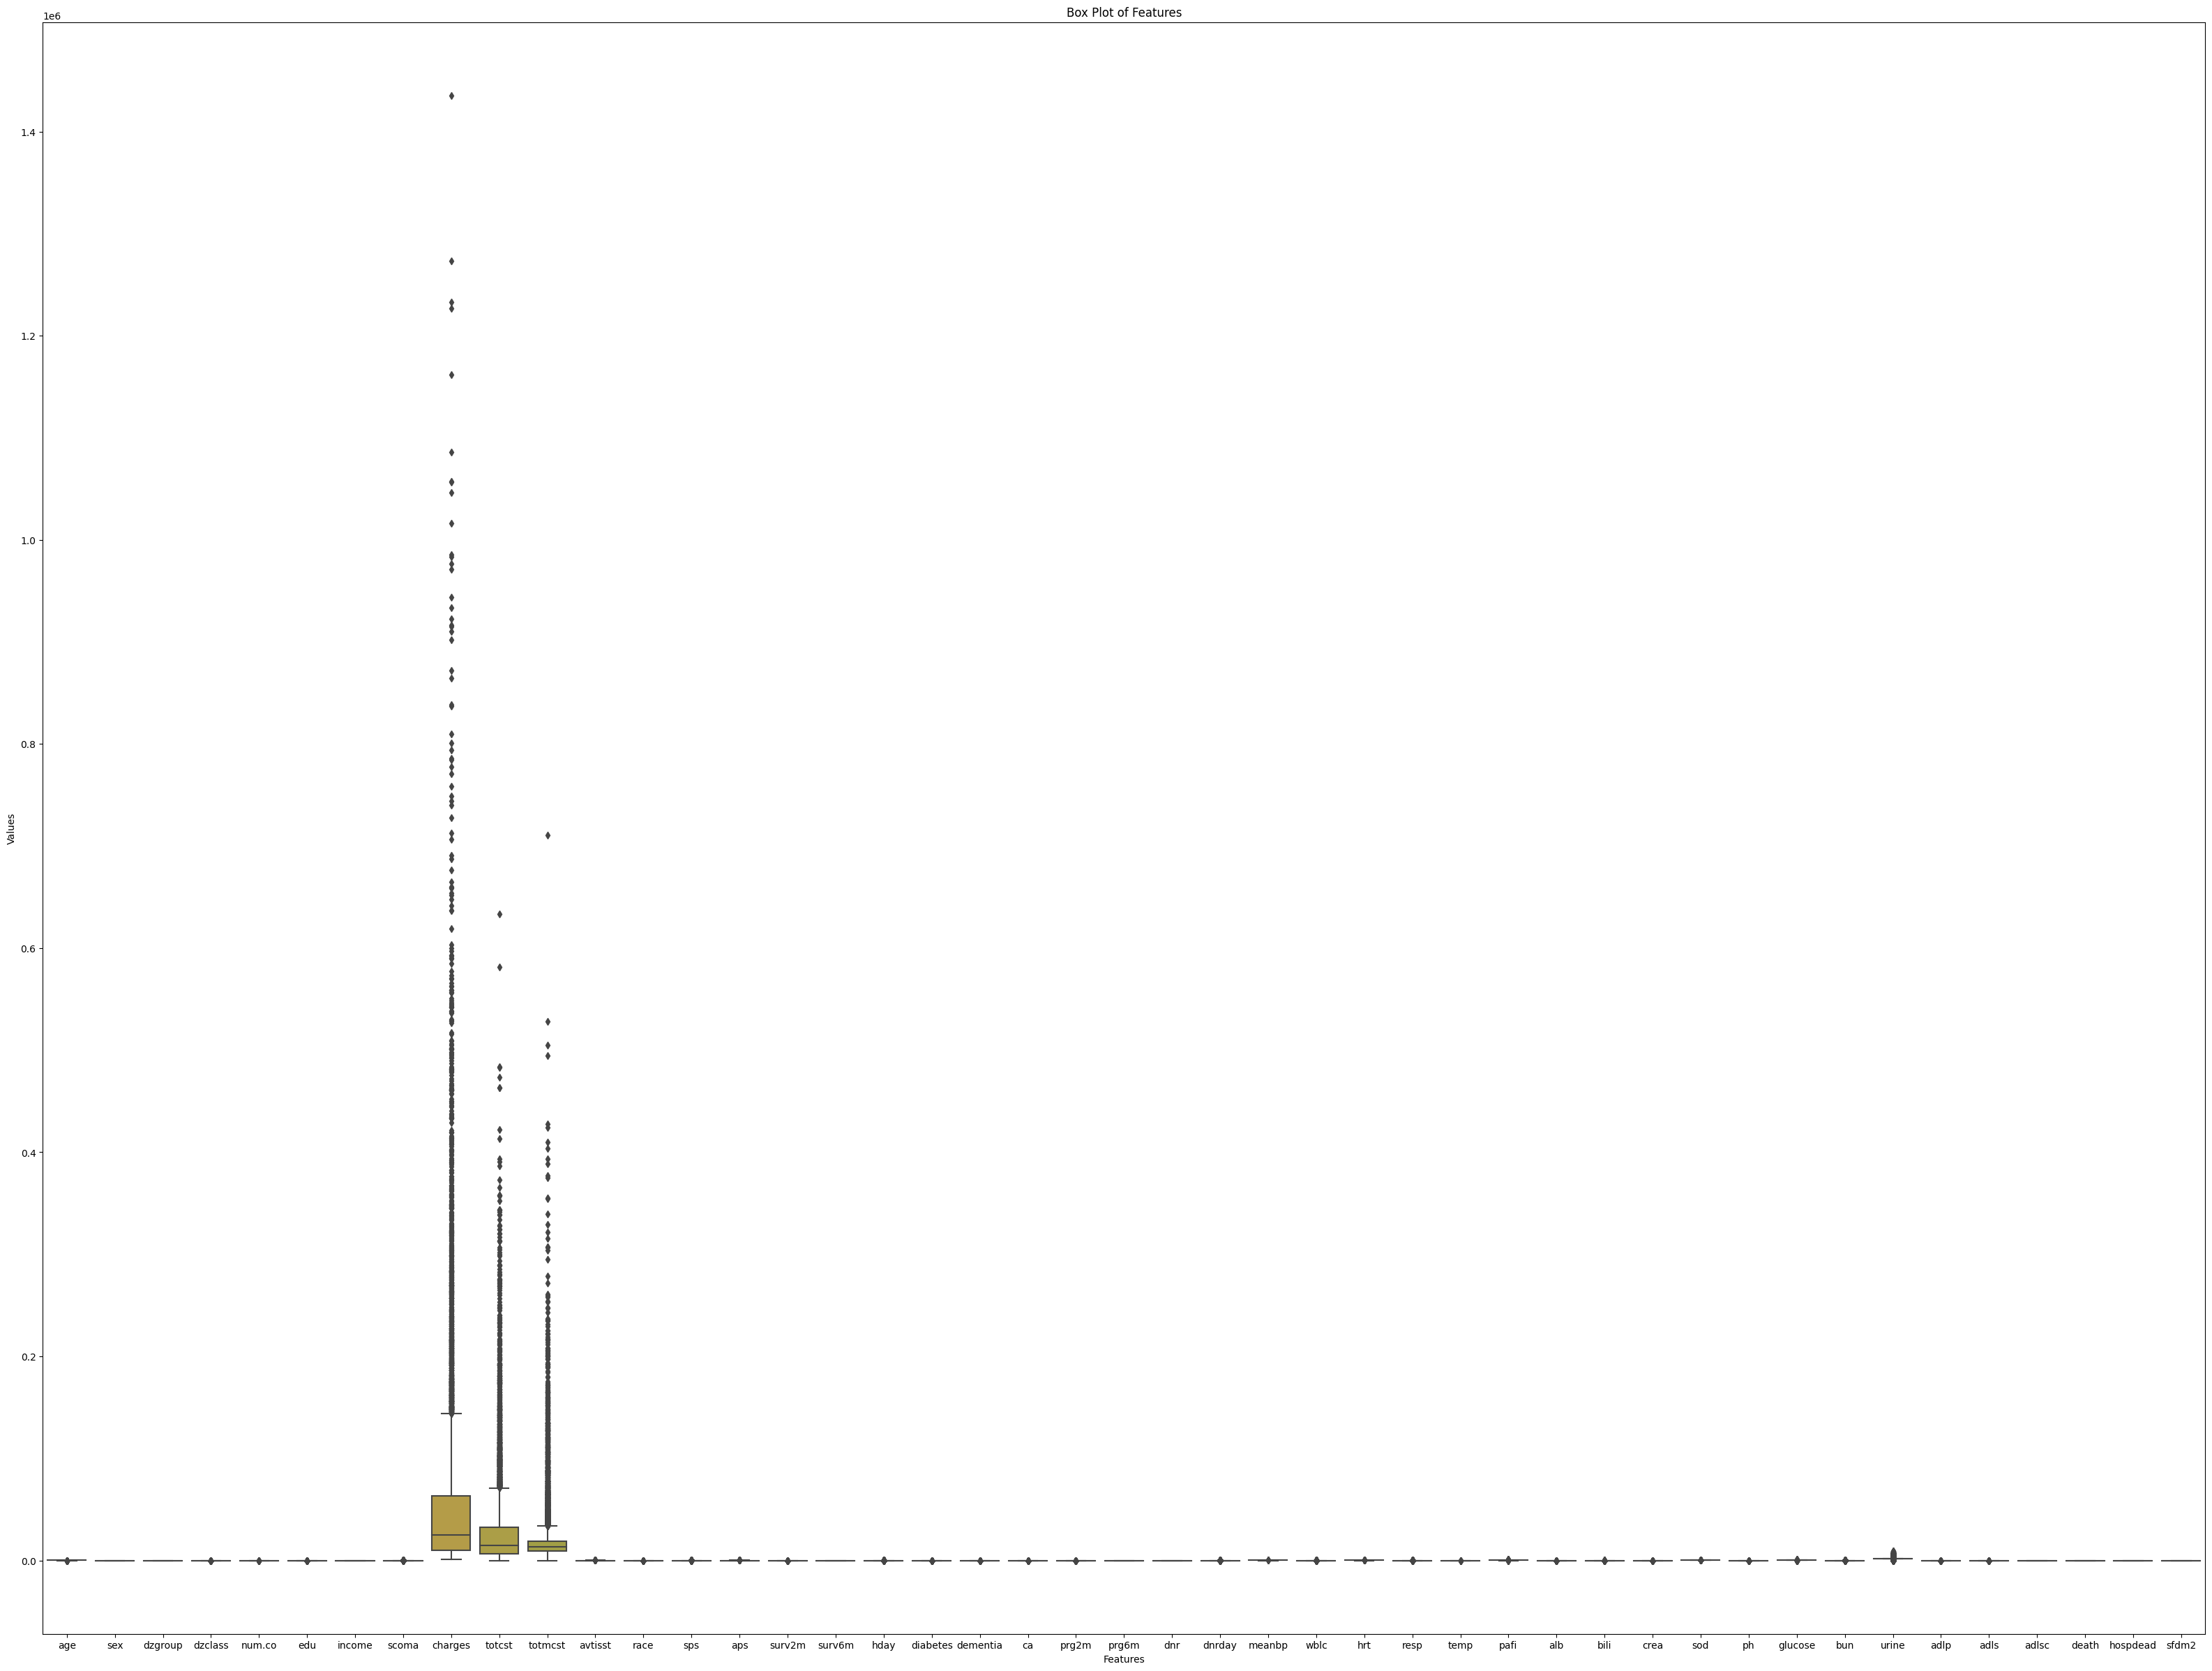

In [19]:
plt.figure(figsize=(40, 30))
sns.boxplot(data=SUPPORT)
plt.title("Box Plot of Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks()
plt.show()

# TRAIN TEST SPLIT

In [20]:
y = SUPPORT['charges']
X = SUPPORT.drop('charges', axis = 1)

In [21]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# # SUPPORT_scaled = preprocessing.normalize(SUPPORT)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

# EDA

In [23]:
def calculate_cv(column):
    mean_value = column.mean()
    std_deviation = column.std()
    if mean_value != 0:
        cv = std_deviation / mean_value
        return cv
i = 0
cv_results = []
for column in pd.DataFrame(X_train).columns:
    cv_results.append(calculate_cv(X_train[column]))
    i+=1
print(cv_results)

[0.24929995074901173, 0.874192455172851, 1.1003160451038694, 1.1184086363672887, 0.718571698454531, 0.2667824018555223, 0.5584888411391007, 2.018288095368922, 1.487534348989488, 1.5408056207138352, 0.5824212462514642, 0.33883361554259783, 0.3888639544475562, 0.5277423767687132, 0.3924080838062986, 0.49098046622004843, 2.0629182678106166, 2.027842077691094, 5.525998536476768, 0.6234765624763356, 0.4321064501941072, 0.5559217869352017, 0.704333260298399, 1.366908133355012, 0.32908166977482056, 0.7604734791903252, 0.3240897946763398, 0.4075511020531257, 0.033784477668670224, 0.404779100523916, 0.2157990039626575, 2.1783016271762556, 0.9453303798566297, 0.04363485787032397, 0.009426011242429536, 0.43258095016477266, 0.7132310733033238, 0.48733047274297536, 2.7403102884419637, 1.2982634330475098, 1.058565575180241, 0.6815267601249146, 1.6919028013226238, 0.7826550243015575]


In [24]:
print(f'Least variability is {min(cv_results)}')

Least variability is 0.009426011242429536


In [25]:
X_train.describe()

age          sex      dzgroup      dzclass       num.co  \
count  7284.000000  7284.000000  7284.000000  7284.000000  7284.000000   
mean     62.651689     0.566859     2.236409     0.826881     1.875206   
std      15.619063     0.495544     2.460756     0.924791     1.347470   
min      18.118990     0.000000     0.000000     0.000000     0.000000   
25%      52.767000     0.000000     0.000000     0.000000     1.000000   
50%      64.882965     1.000000     1.000000     1.000000     2.000000   
75%      74.089737     1.000000     4.000000     1.000000     3.000000   
max     100.849000     1.000000     7.000000     3.000000     8.000000   

               edu       income        scoma         totcst        totmcst  \
count  7284.000000  7284.000000  7284.000000    7284.000000    7284.000000   
mean     11.769083     1.859418    12.235859   28947.068814   22826.659537   
std       3.139784     1.038464    24.695489   43059.759163   35171.445317   
min       0.000000     0.000000     0.000000       0.000000    -102.719970   
25%      11.000000     1.000000     0.000000    6593.621125    9402.546875   
50%      12.000000     2.000000     0.000000   14452.734400   13223.500000   
75%      12.000000     3.000000     9.000000   32389.898425   19261.894550   
max      31.000000     3.000000   100.000000  633212.000000  710682.000000   

       ...           ph      glucose          bun        urine         adlp  \
count  ...  7284.000000  7284.000000  7284.000000  7284.000000  7284.000000   
mean   ...     7.416497   147.291186    27.923119  2072.908344     0.440143   
std    ...     0.069908    63.715361    19.915636  1010.191403     1.206128   
min    ...     6.829102     0.000000     1.000000     0.000000     0.000000   
25%    ...     7.399414   133.000000    22.000000  1968.000000     0.000000   
50%    ...     7.419922   135.000000    23.000000  1968.000000     0.000000   
75%    ...     7.449219   136.000000    25.000000  1968.000000     0.000000   
max    ...     7.769531  1092.000000   300.000000  9000.000000     7.000000   

              adls        adlsc        death     hospdead        sfdm2  
count  7284.000000  7284.000000  7284.000000  7284.000000  7284.000000  
mean      1.427924     1.877531     0.682867     0.258924     2.532812  
std       1.853822     1.987490     0.465392     0.438074     1.982318  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       1.000000     1.000000     1.000000     0.000000     3.000000  
75%       1.000000     3.000000     1.000000     1.000000     4.000000  
max       7.000000     7.073242     1.000000     1.000000     5.000000  

[8 rows x 44 columns]

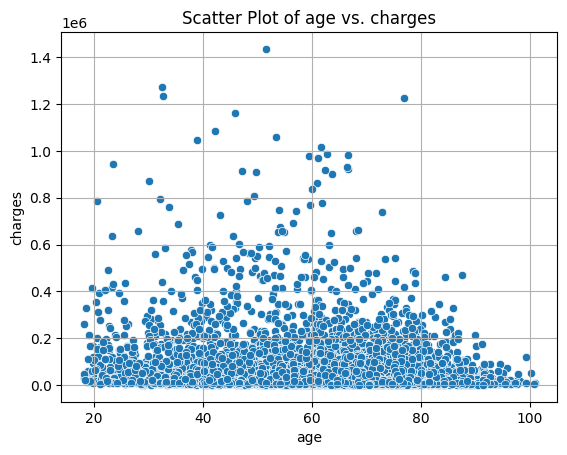

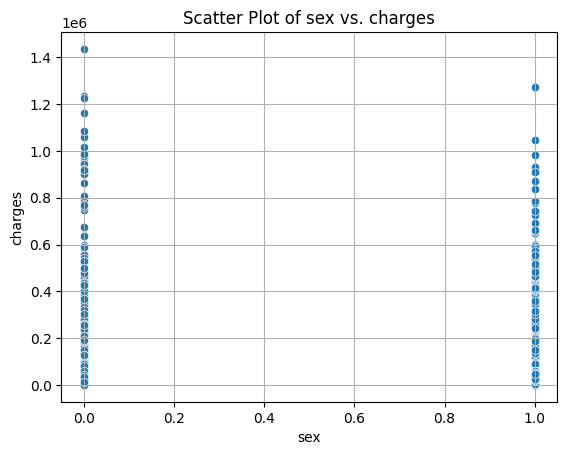

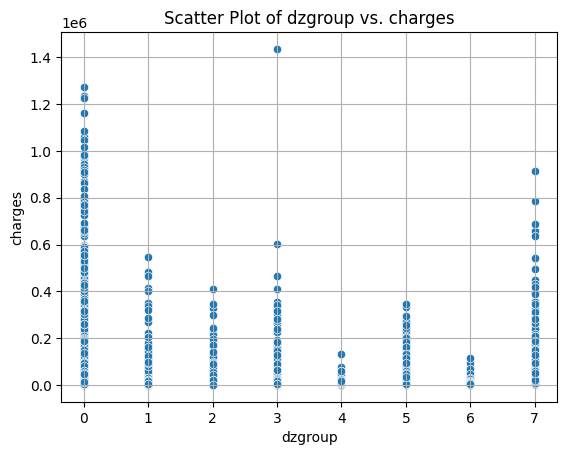

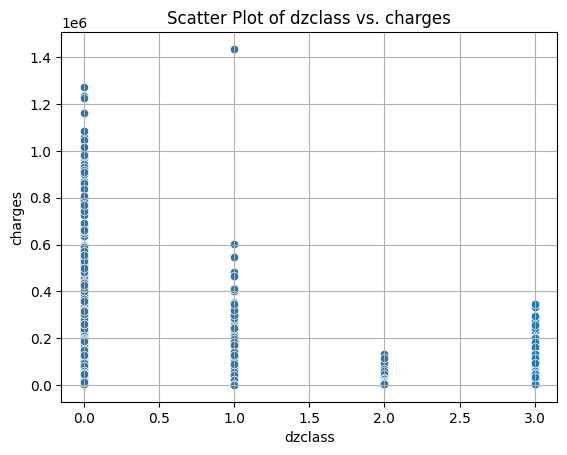

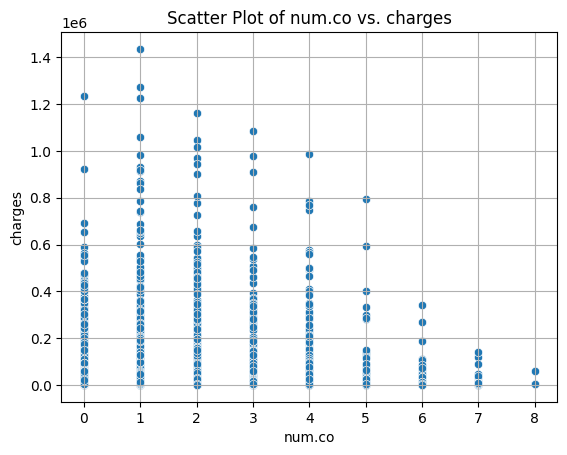

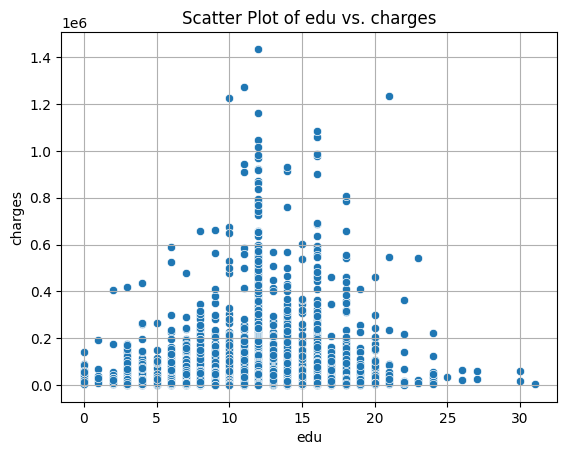

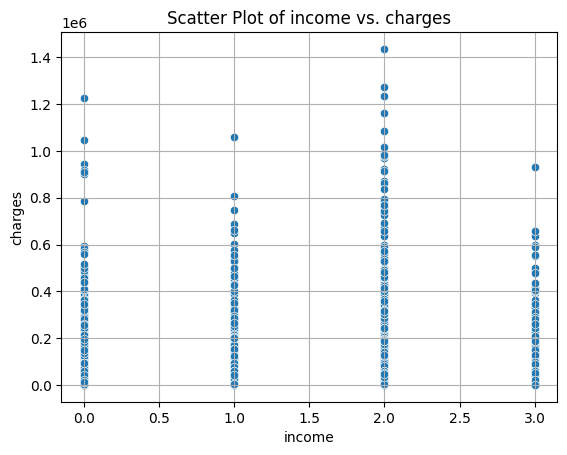

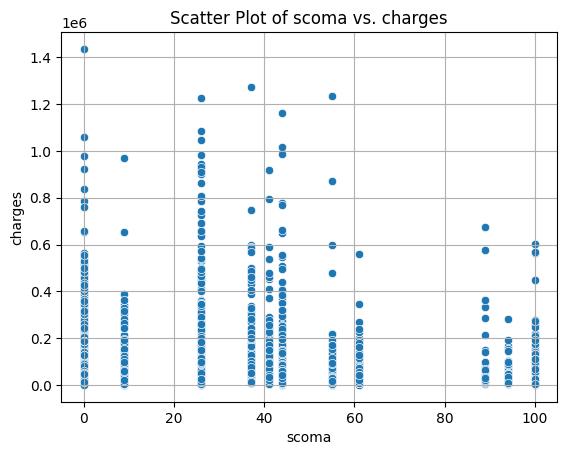

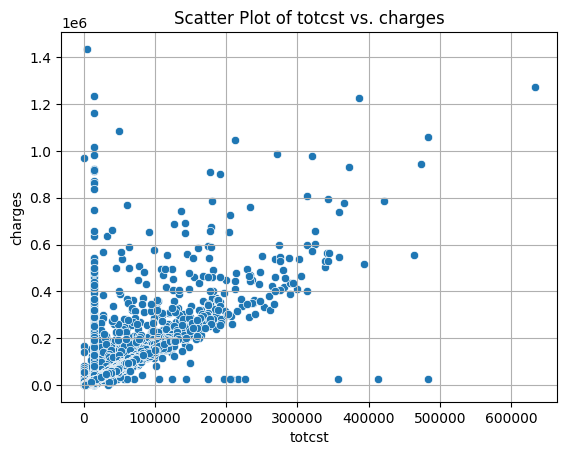

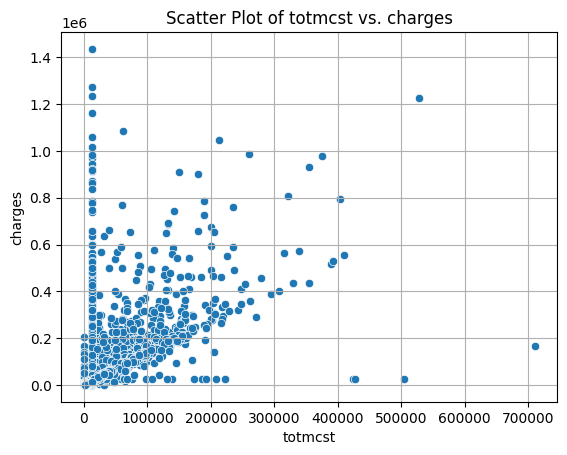

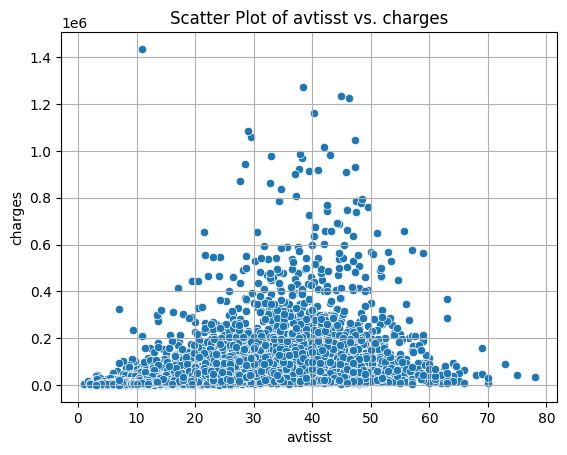

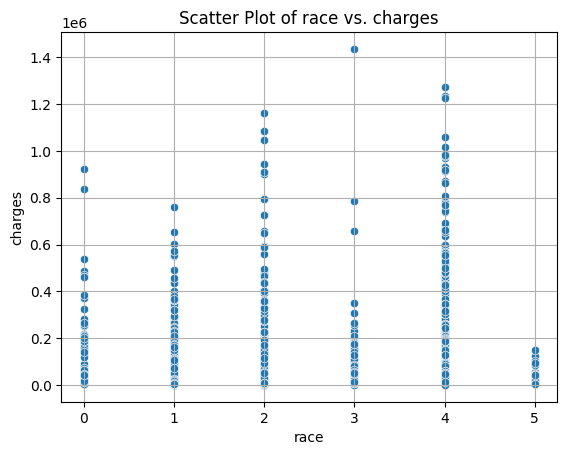

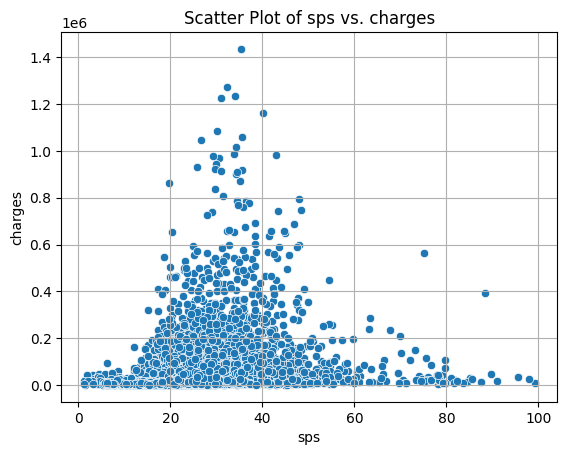

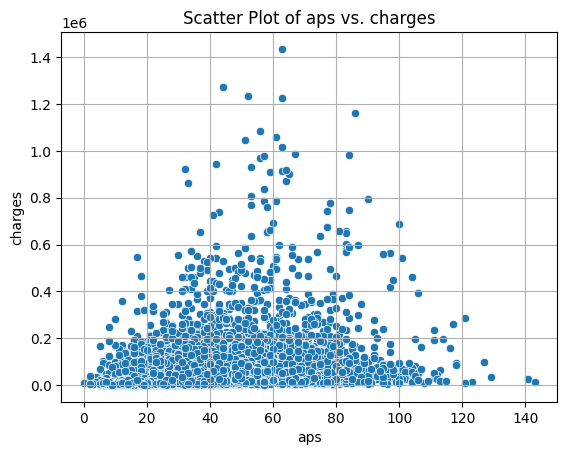

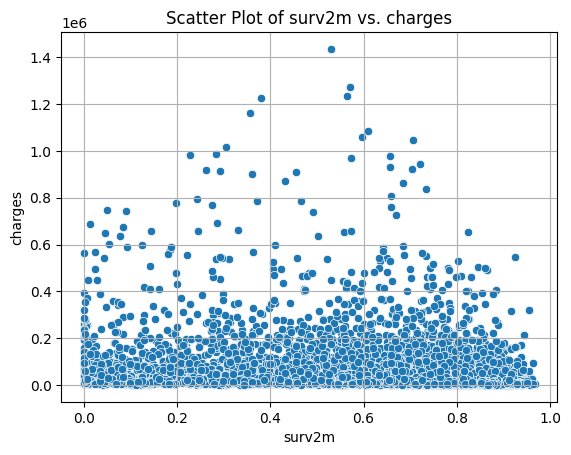

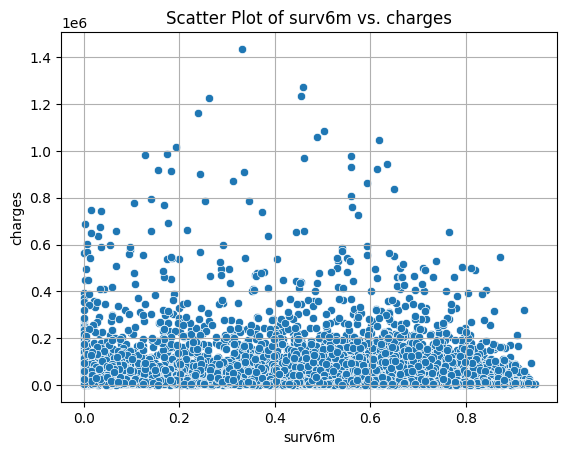

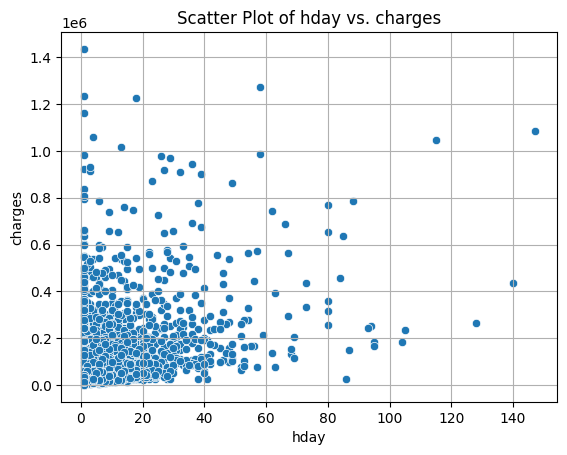

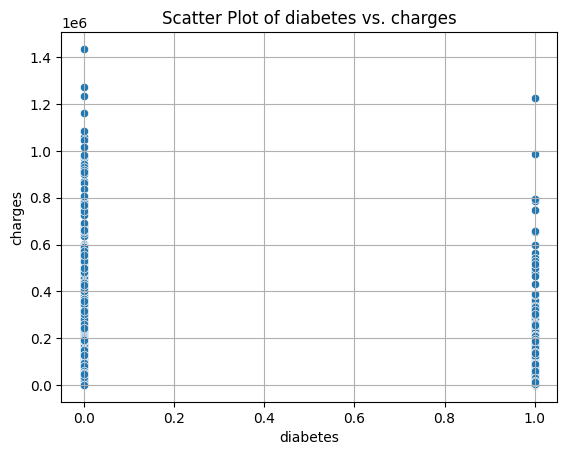

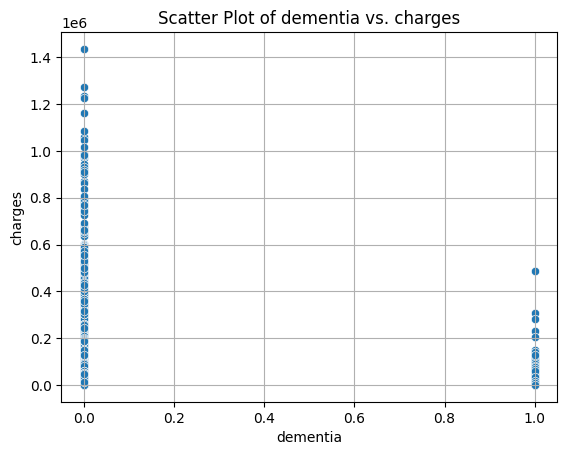

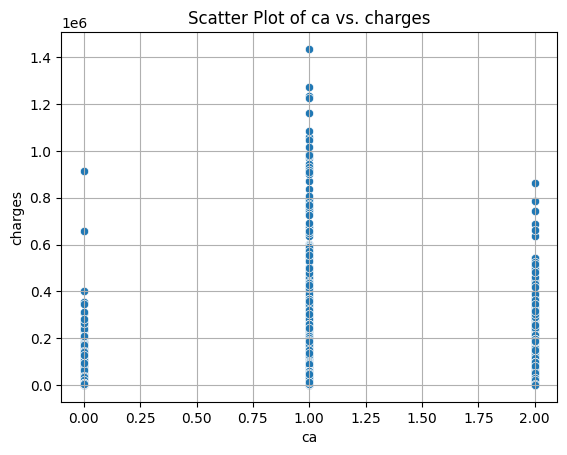

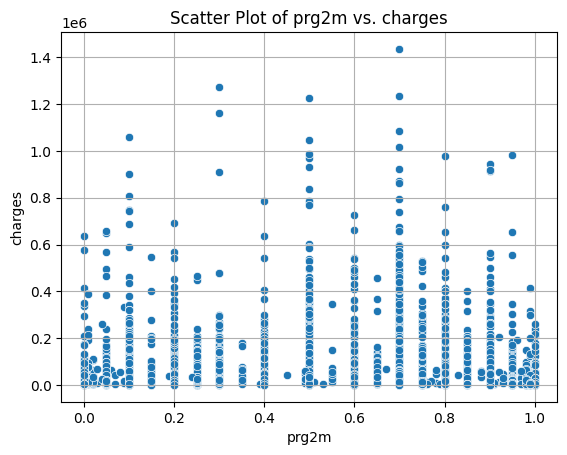

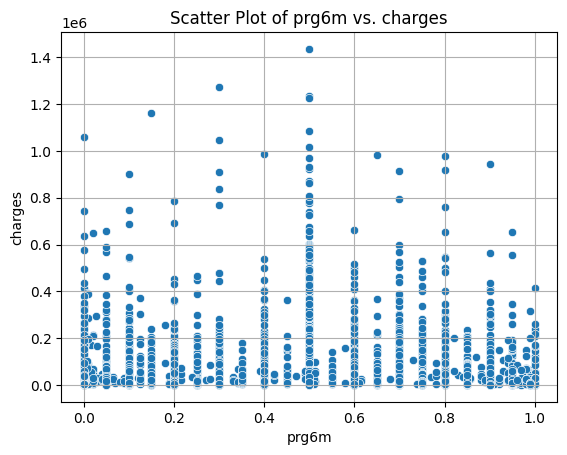

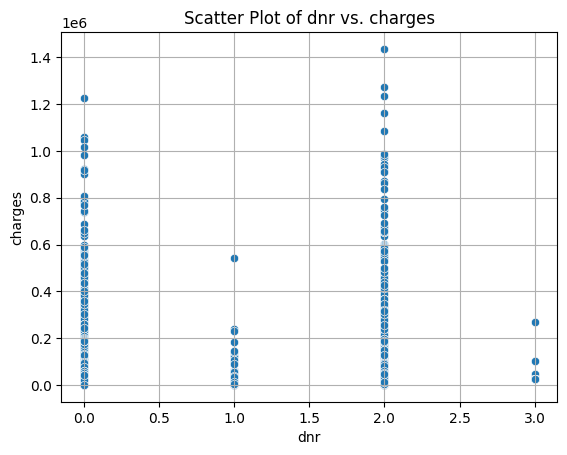

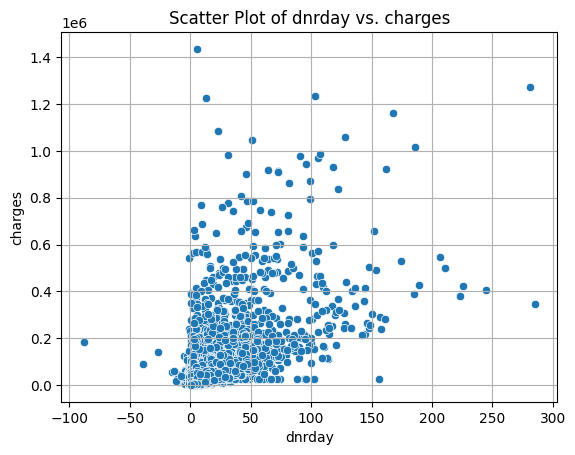

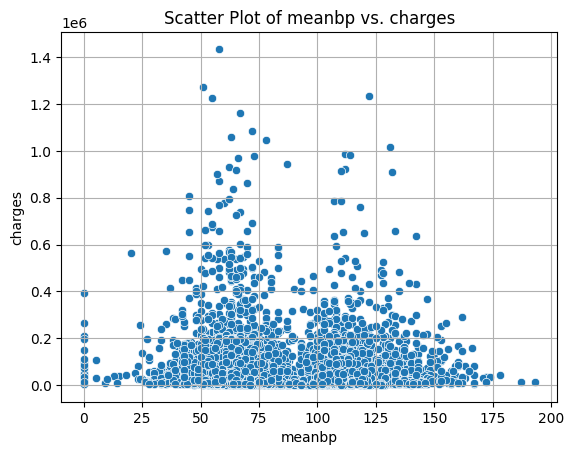

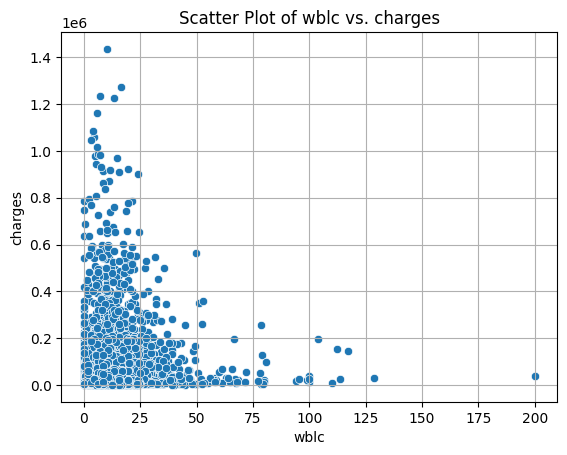

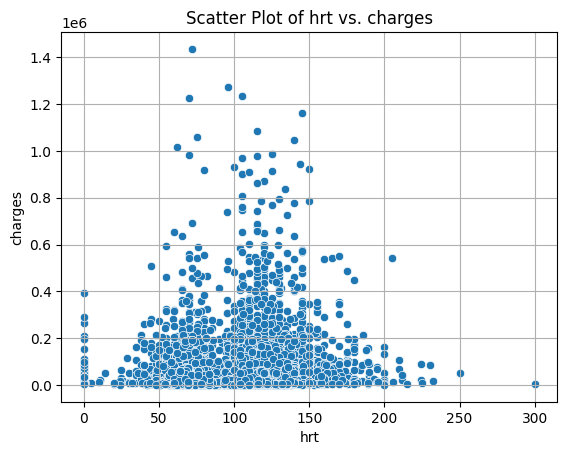

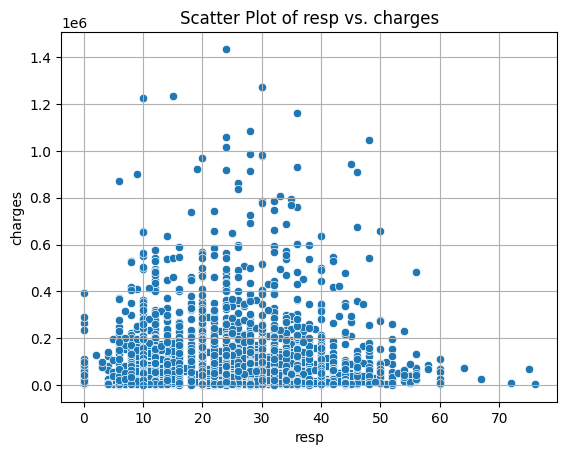

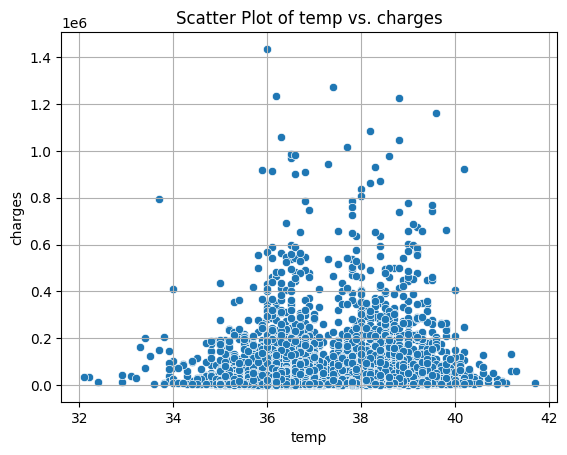

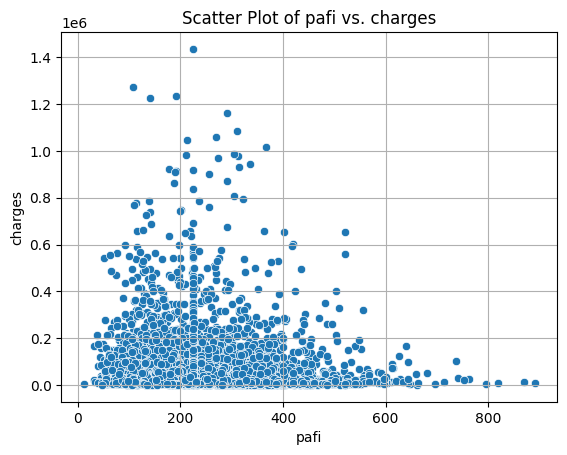

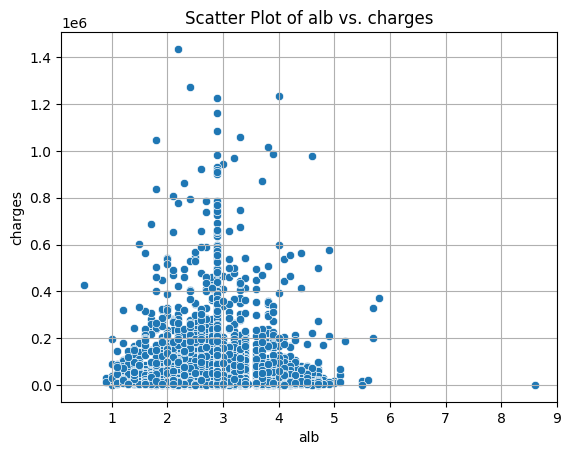

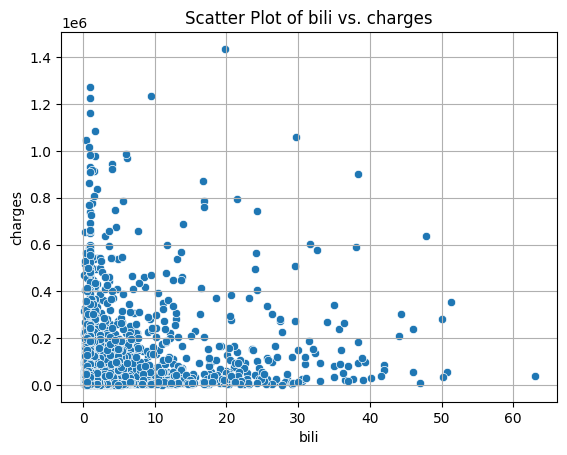

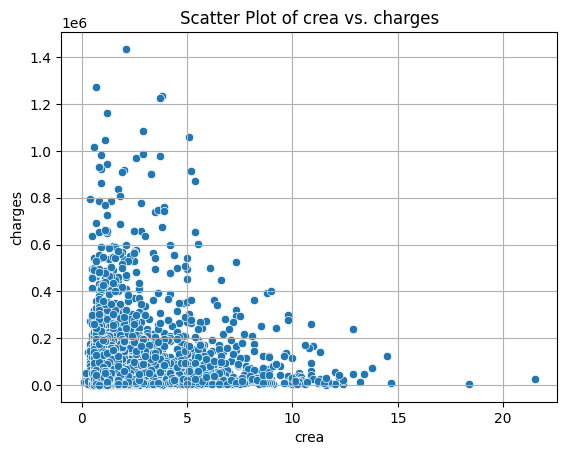

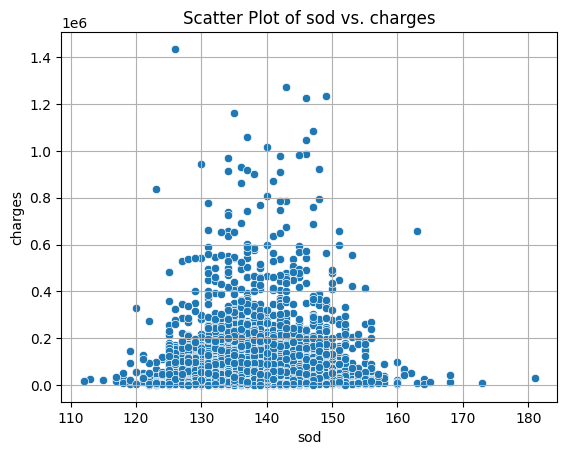

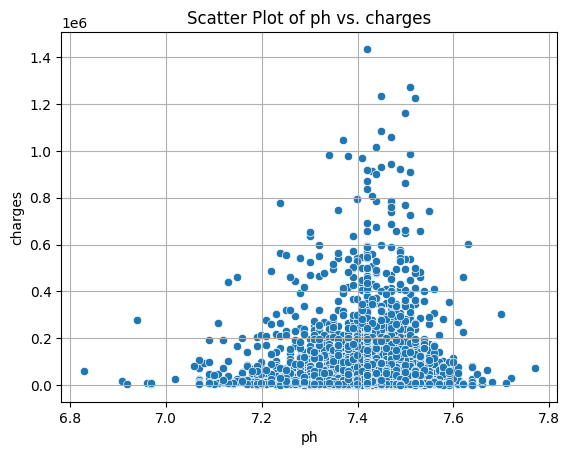

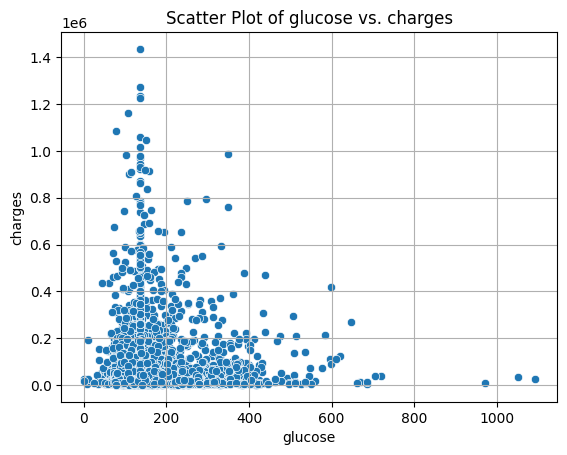

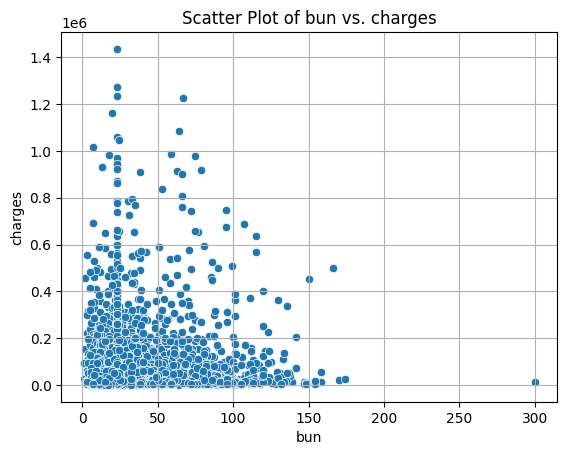

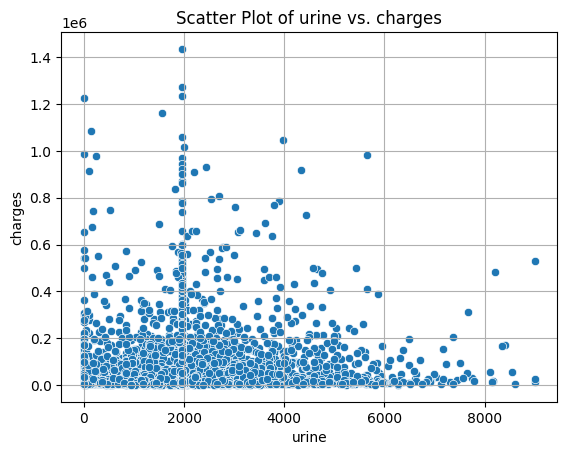

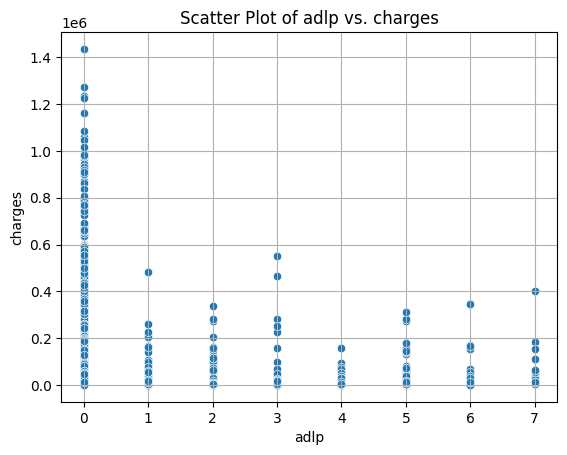

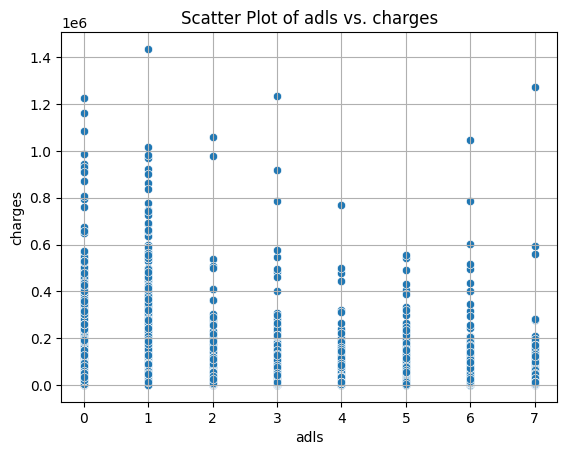

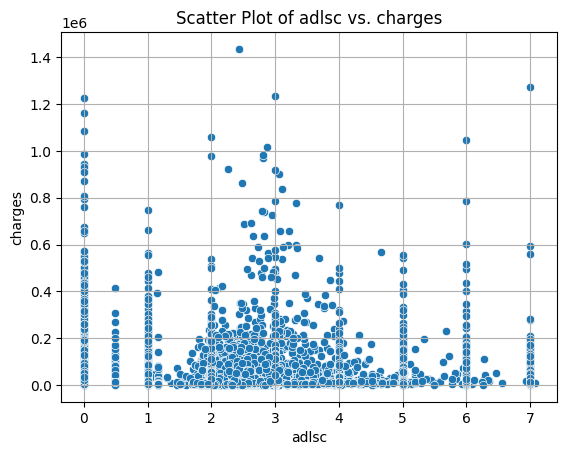

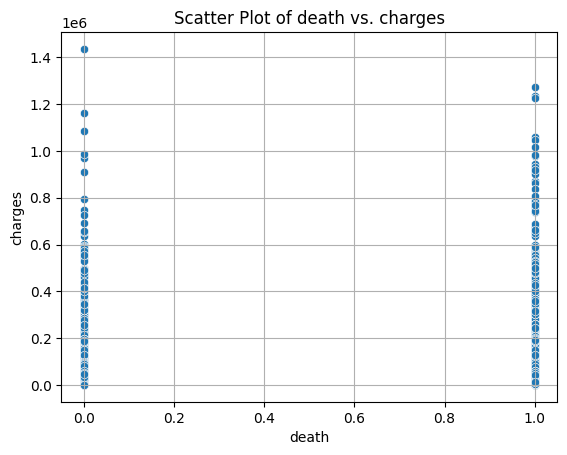

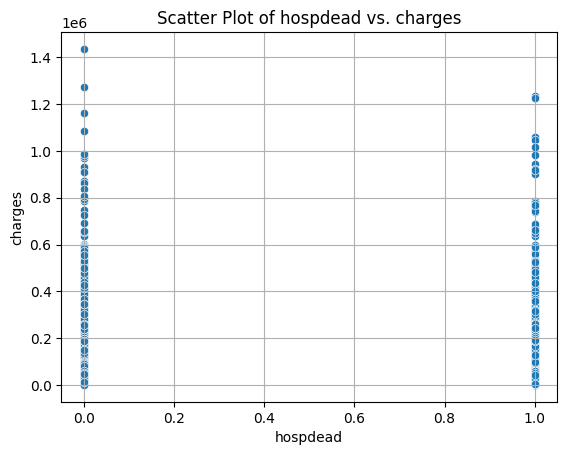

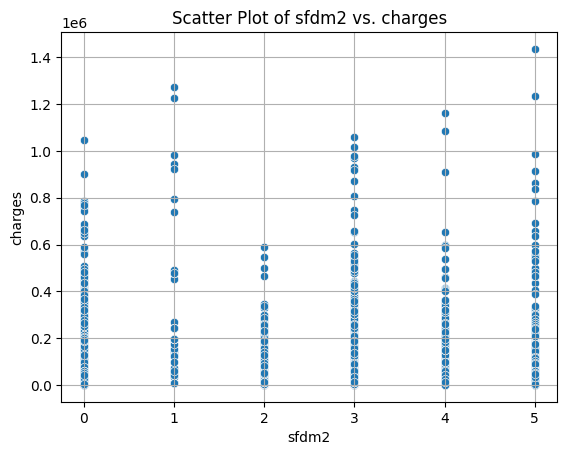

In [26]:
for column in X_train.columns: 
    sns.scatterplot(data=X_train, x=column, y=y)
    plt.title(f'Scatter Plot of {column} vs. charges')
    plt.xlabel(column)
    plt.ylabel('charges')
    plt.grid(True)
    plt.show()

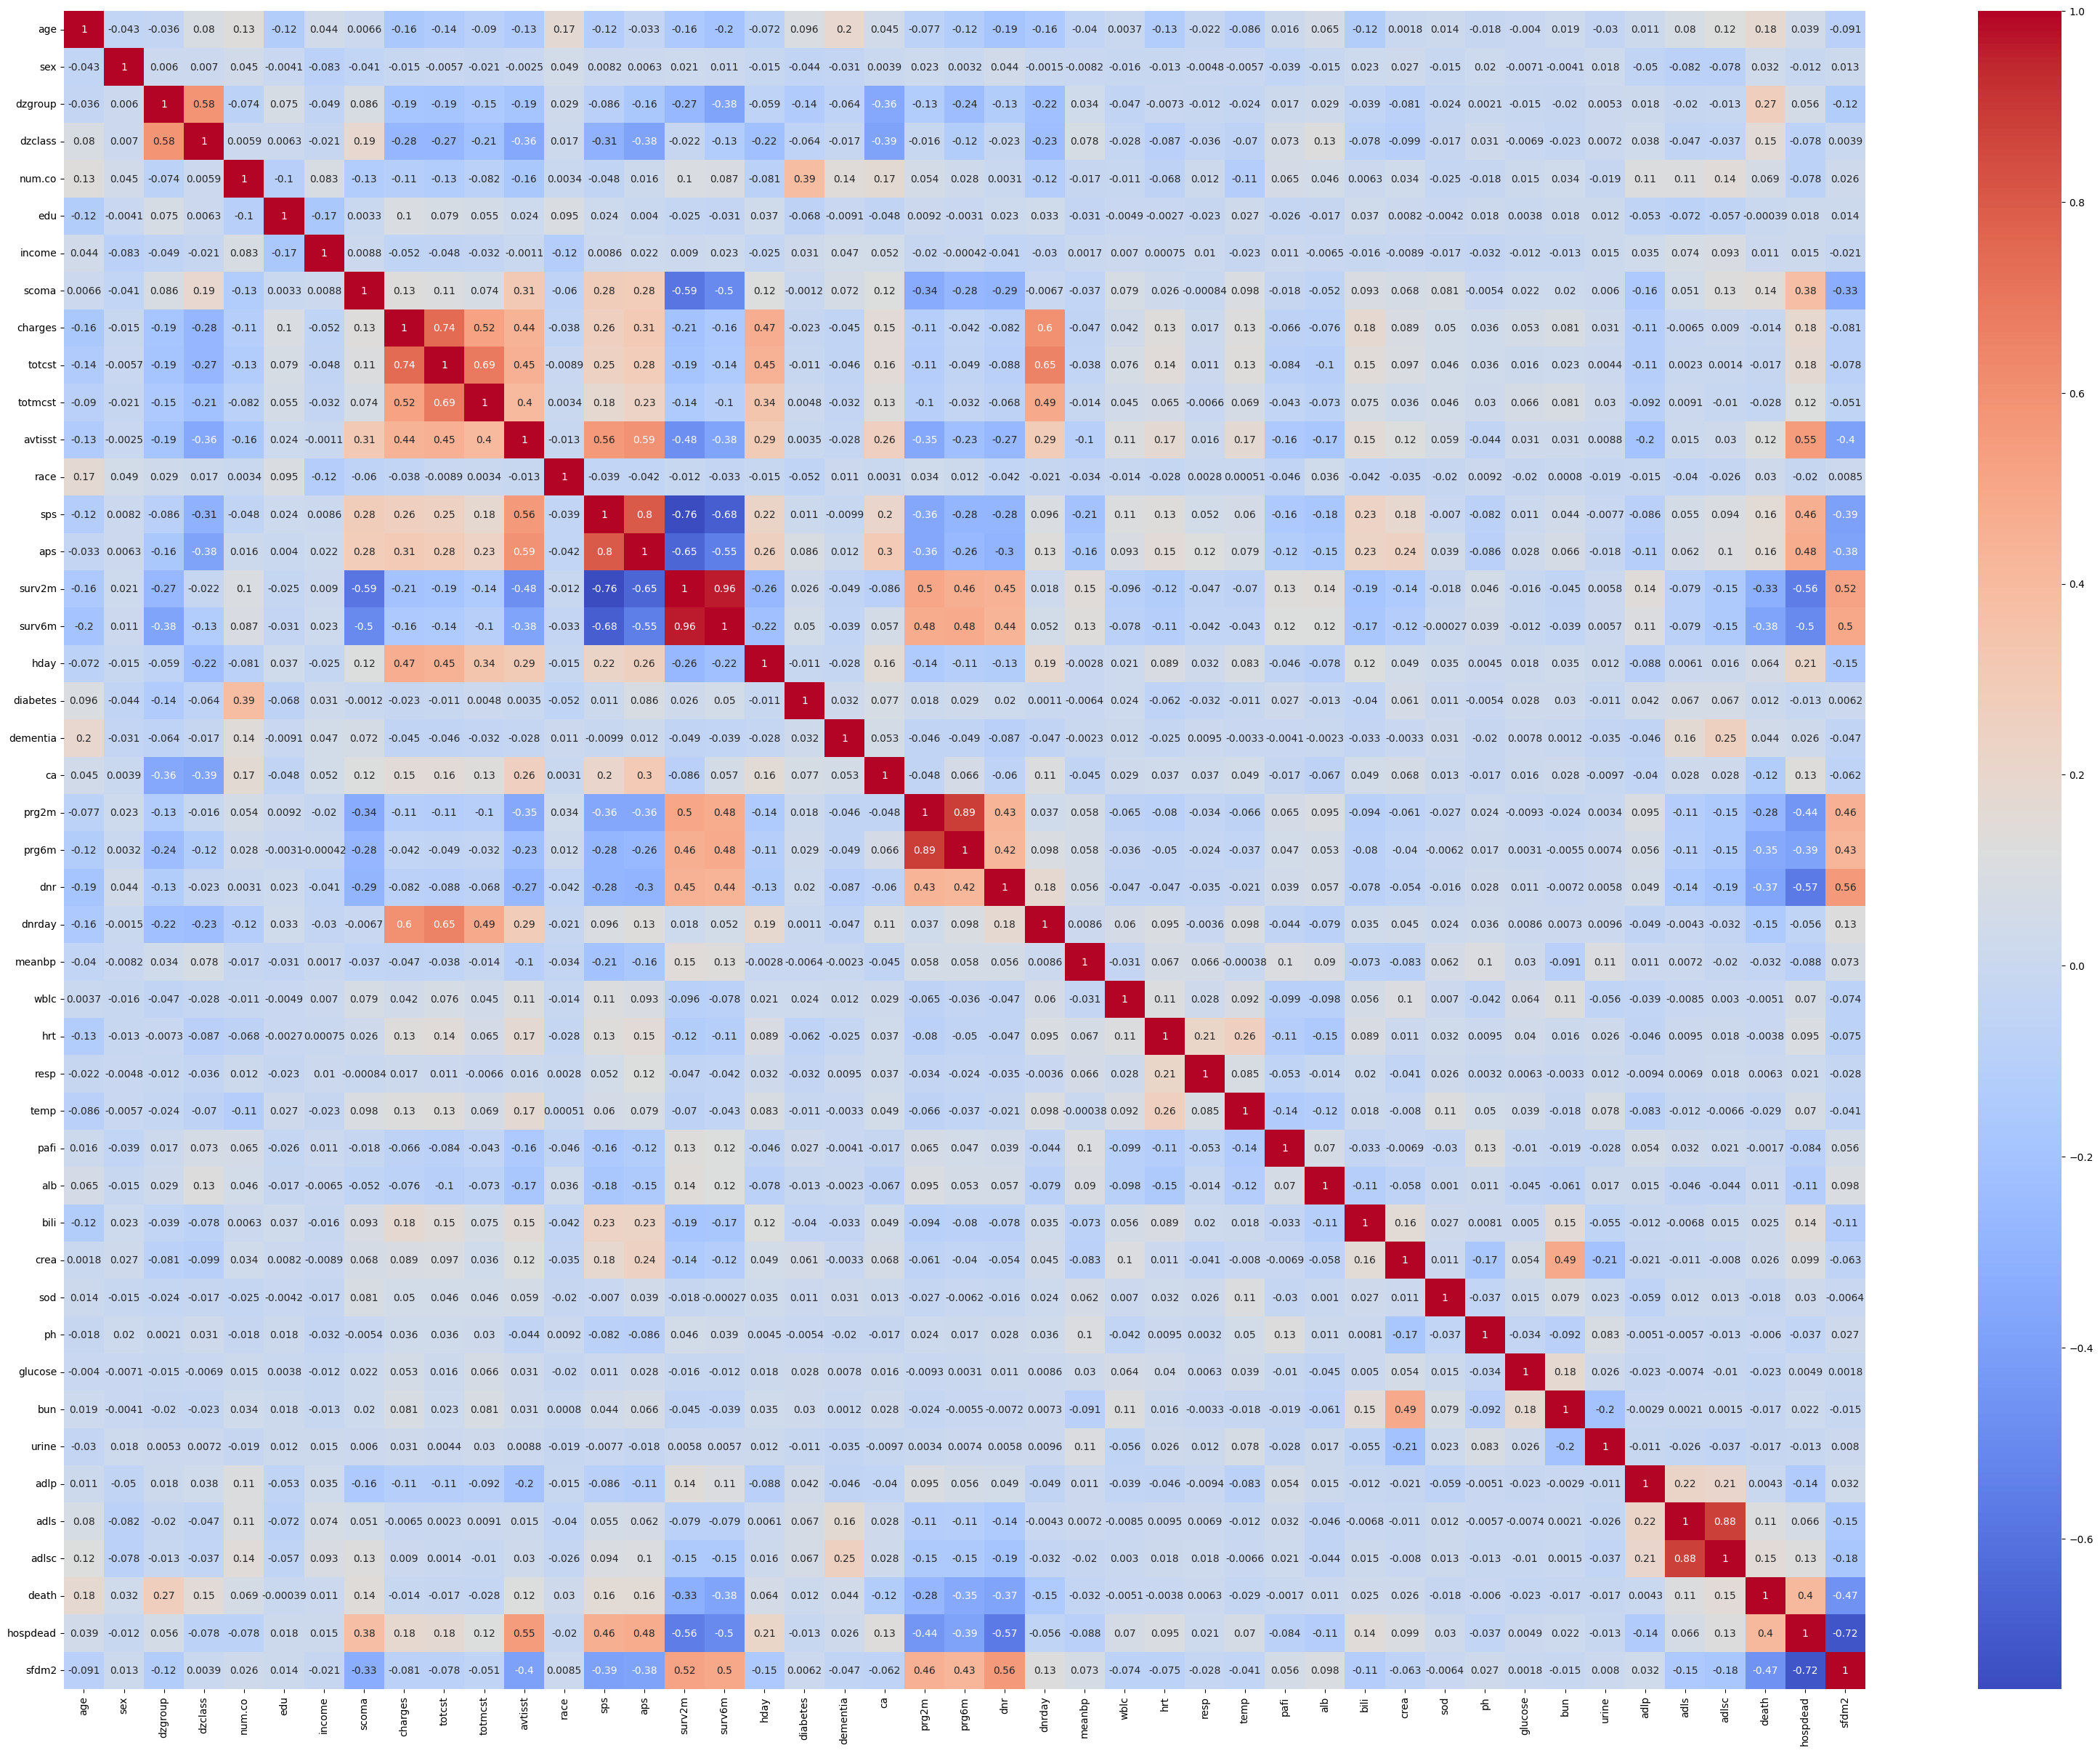

In [27]:
plt.figure(figsize=(40, 30))
corr_matrix = SUPPORT.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

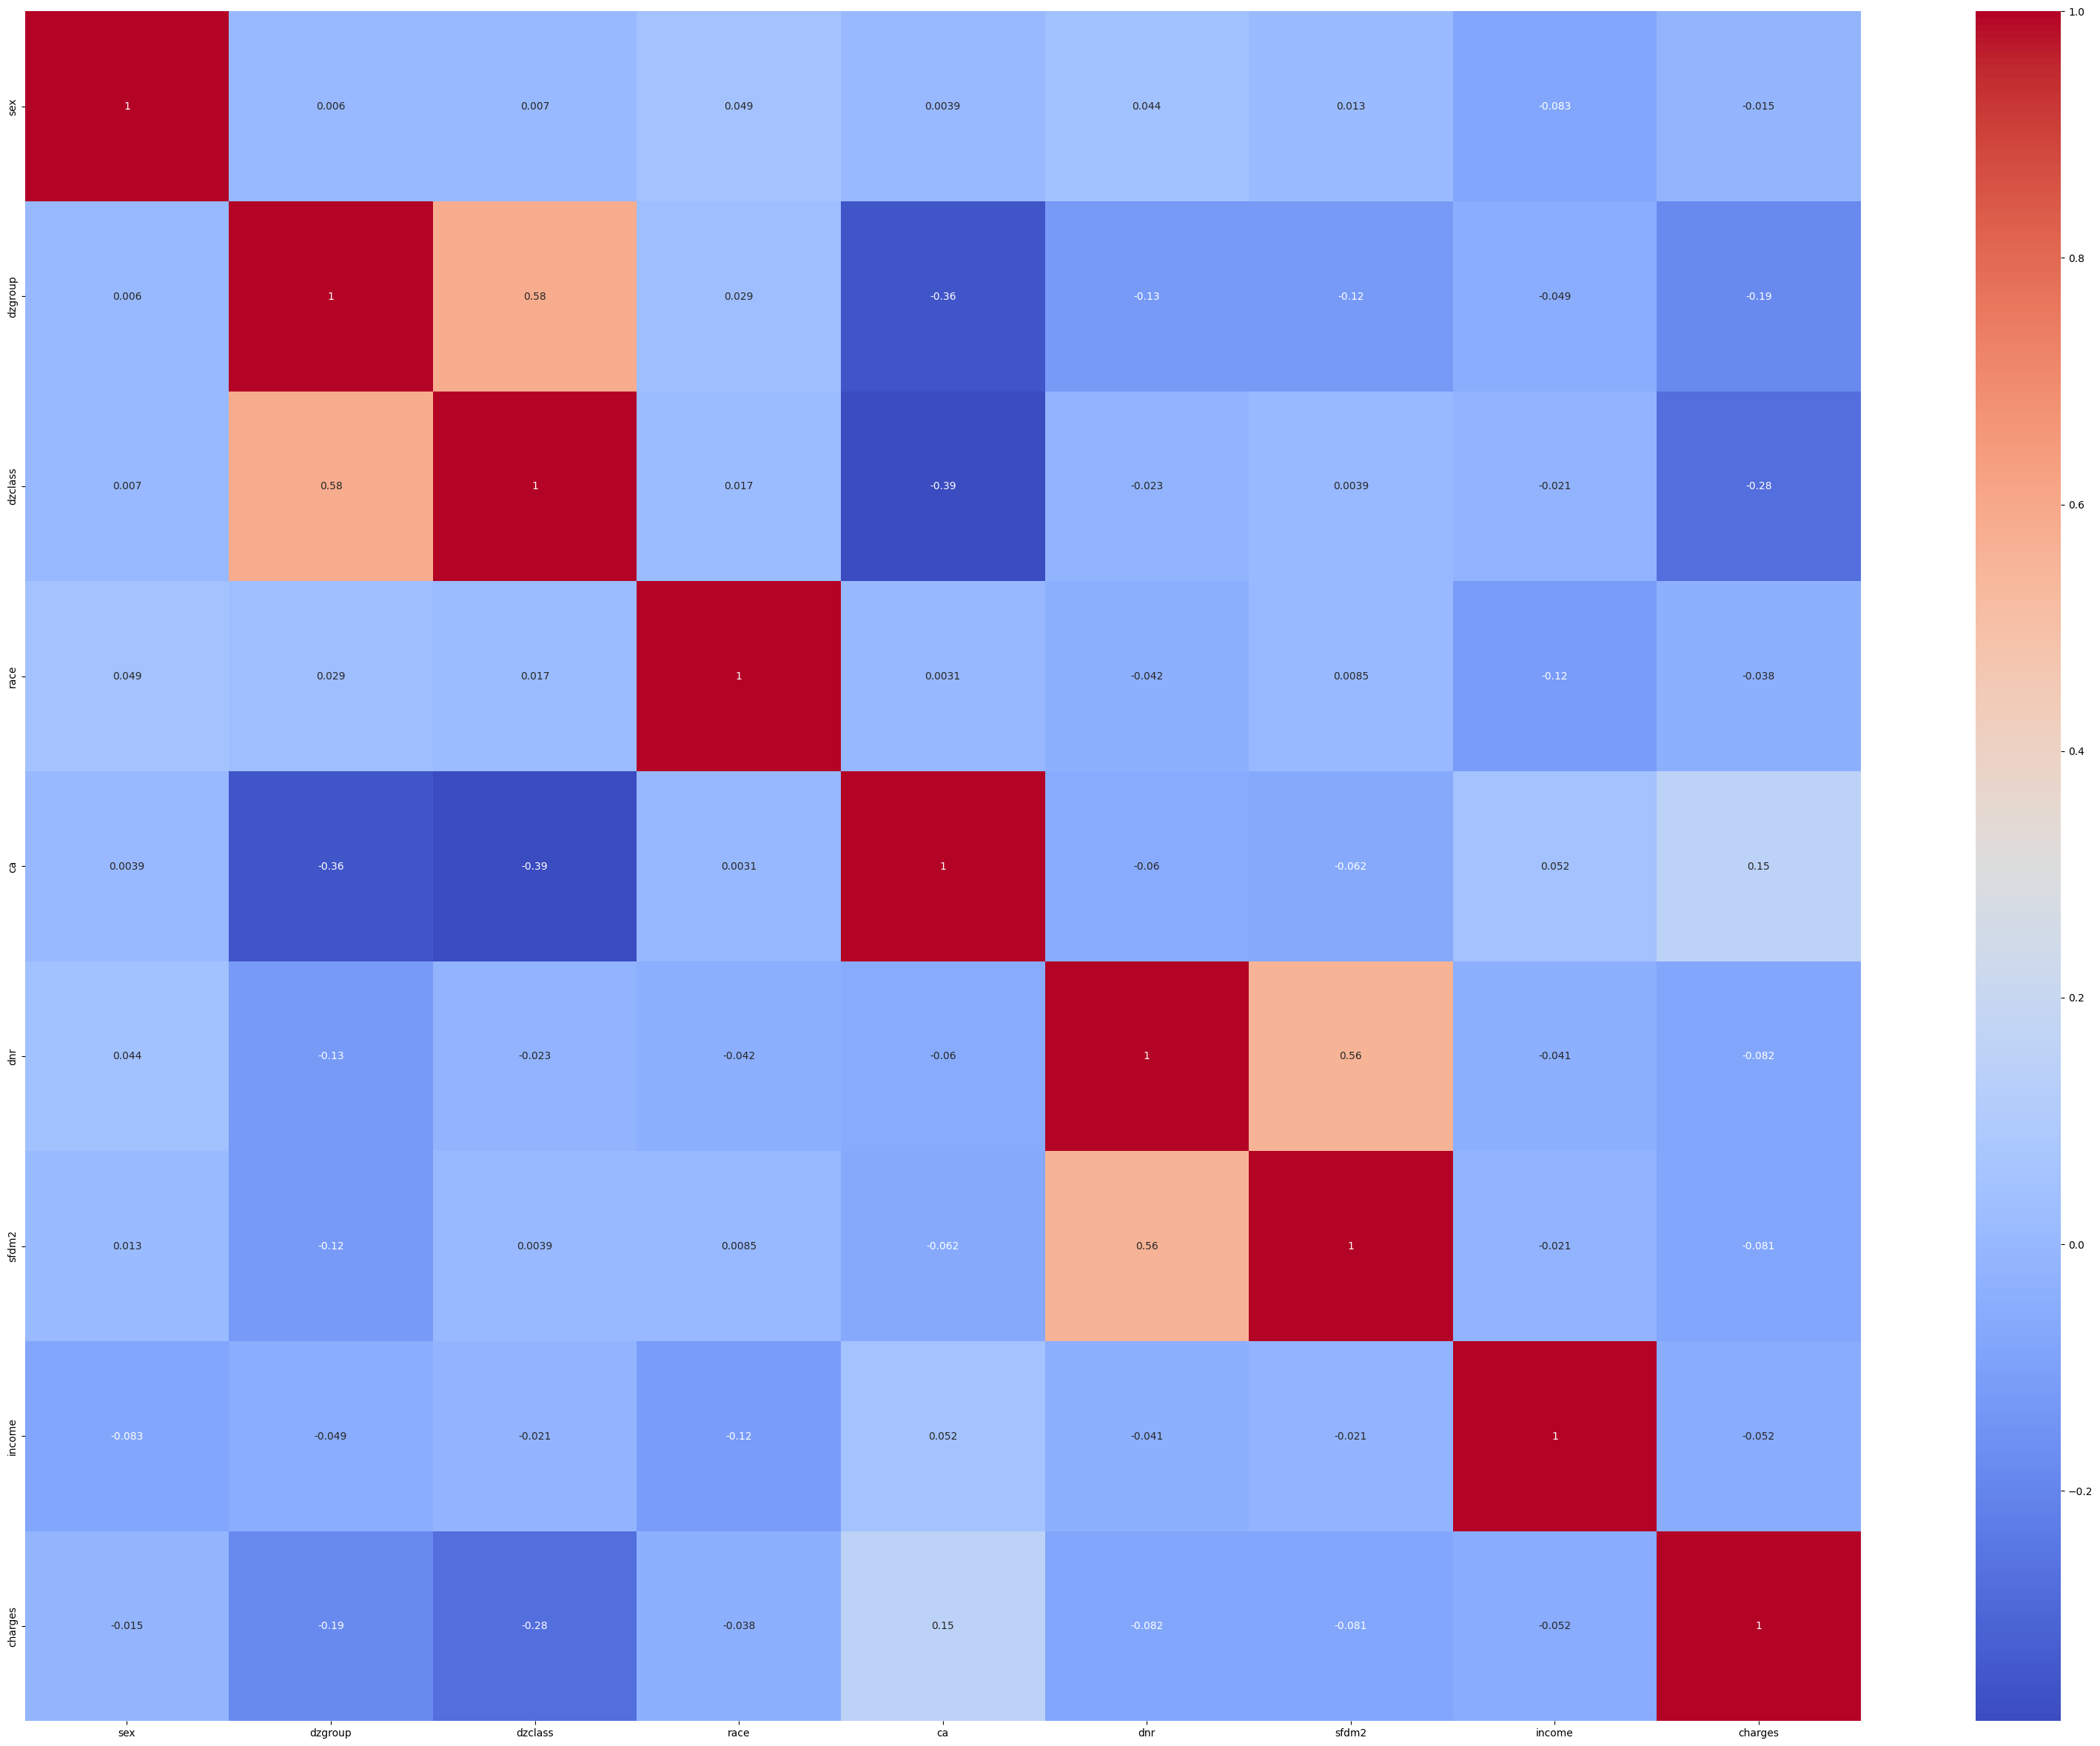

In [70]:
plt.figure(figsize=(40, 30))
categorical_corr = ['sex', 'dzgroup','dzclass','race','ca','dnr','sfdm2','income','charges']
corr_matrix = SUPPORT[categorical_corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [29]:
# Chi-Square
from itertools import combinations
from scipy.stats import chi2_contingency

pairs = list(combinations(categorical_label, 2))

# Perform chi-square test for each pair of categorical predictors
for pair in pairs:
    contingency_table = pd.crosstab(X_train[pair[0]], X_train[pair[1]])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {pair[0]} vs {pair[1]}:")
    print(f"  Chi-square statistic: {chi2}")
    print(f"  p-value: {p}")
    print(f"              ")


# Note: all categorical predicts show high-levels of inpendency from p-value with the exception of ca vs. sex (cancer vs sex) with a 0.2187 p-value
# with alpha of 0.05

Chi-square test for sex vs dzgroup:
  Chi-square statistic: 68.35810581564003
  p-value: 3.169740387933618e-12
              
Chi-square test for sex vs dzclass:
  Chi-square statistic: 38.22988327773862
  p-value: 2.5268092072814504e-08
              
Chi-square test for sex vs race:
  Chi-square statistic: 21.52288588673899
  p-value: 0.0006450091432590911
              
Chi-square test for sex vs ca:
  Chi-square statistic: 3.321965577992265
  p-value: 0.1899522053992353
              
Chi-square test for sex vs dnr:
  Chi-square statistic: 20.33333321033177
  p-value: 0.00014477228452004594
              
Chi-square test for sex vs sfdm2:
  Chi-square statistic: 21.848486549359517
  p-value: 0.0005594834076082268
              
Chi-square test for dzgroup vs dzclass:
  Chi-square statistic: 21852.0
  p-value: 0.0
              
Chi-square test for dzgroup vs race:
  Chi-square statistic: 130.83031390196476
  p-value: 5.495405604934609e-13
              
Chi-square test for dzgroup 

In [30]:
SUPPORT_no_outliers = SUPPORT
for column in SUPPORT_no_outliers.columns:
    SUPPORT_no_outliers = SUPPORT_no_outliers[(SUPPORT_no_outliers[column] > SUPPORT_no_outliers[column].quantile(0.25) - 1.5 * (SUPPORT_no_outliers[column].quantile(0.75) - SUPPORT_no_outliers[column].quantile(0.25))) & 
                             (SUPPORT_no_outliers[column] < SUPPORT_no_outliers[column].quantile(0.75) + 1.5 * (SUPPORT_no_outliers[column].quantile(0.75) - SUPPORT_no_outliers[column].quantile(0.25)))]

In [31]:
SUPPORT_no_outliers

Empty DataFrame
Columns: [age, sex, dzgroup, dzclass, num.co, edu, income, scoma, charges, totcst, totmcst, avtisst, race, sps, aps, surv2m, surv6m, hday, diabetes, dementia, ca, prg2m, prg6m, dnr, dnrday, meanbp, wblc, hrt, resp, temp, pafi, alb, bili, crea, sod, ph, glucose, bun, urine, adlp, adls, adlsc, death, hospdead, sfdm2]
Index: []

[0 rows x 45 columns]

In [39]:
y_pred = best_model_fit_stepwise.predict(X_test_selected)
residuals = y_test - y_pred

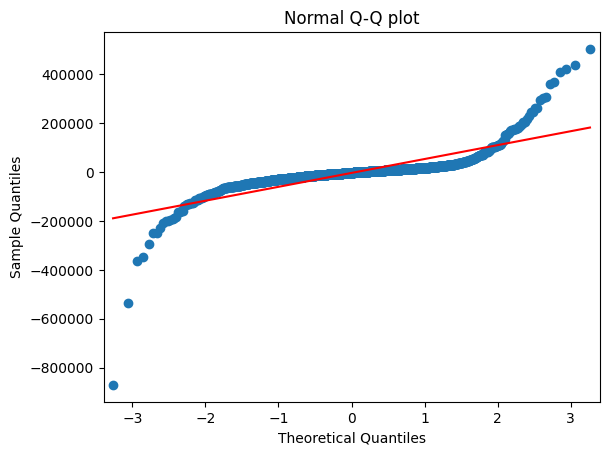

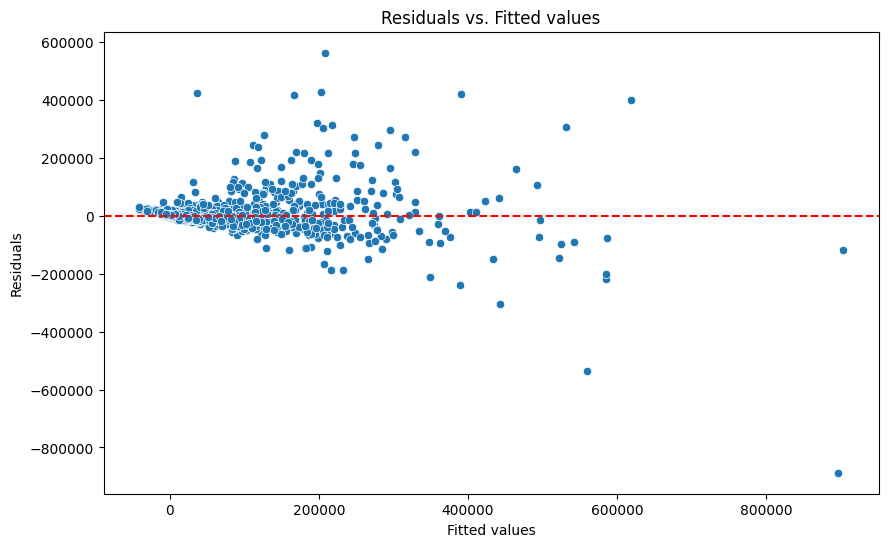

IndexError: index 4 is out of bounds for axis 0 with size 4

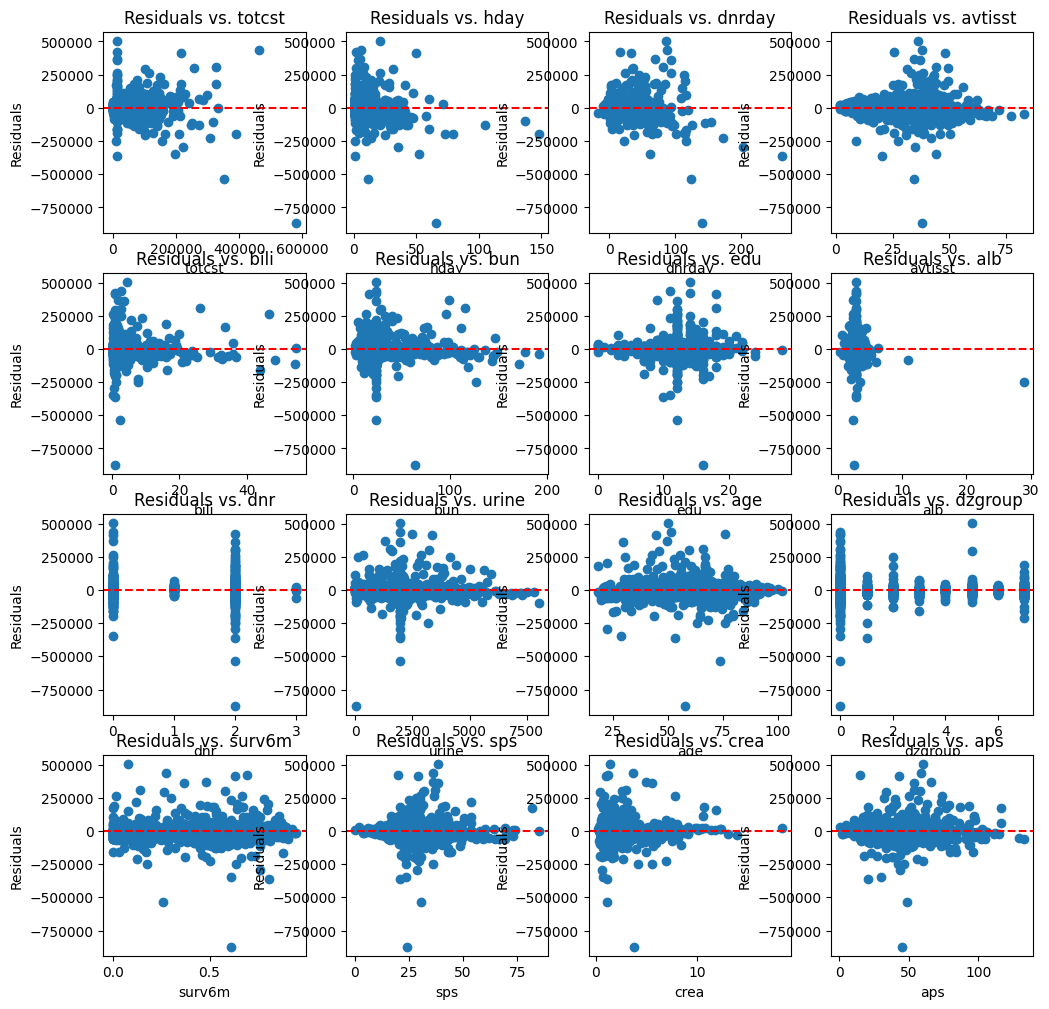

In [75]:
residuals = y_test - y_pred
# Calculate the weights based on the absolute residuals
weights = 1 / np.abs(residuals)

# Fit a weighted least squares (WLS) model
wls_model = sm.WLS(y_test, sm.add_constant(X_test), weights=weights).fit()

# Get the predicted values from the WLS model
y_pred_wls = wls_model.predict(sm.add_constant(X_test))

# Calculate the new residuals using the WLS predictions
residuals_wls = y_test - y_pred_wls
# Normal Q-Q plot
sm.qqplot(residuals, line='s') # need to update
plt.title('Normal Q-Q plot') # need to update
plt.show()
# Residuals vs. Fitted values plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=(residuals_wls))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted values")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
# Manually calculate residuals

fig, axs = plt.subplots(4, 4, figsize=(12, 12))  # 4x4 matrix of subplots

# Loop through each predictor for individual residual plots
for i, predictor in enumerate(X_test_selected.columns):
    row = i // 4  # Determine the row index
    col = i % 4   # Determine the column index
    
    axs[row, col].scatter(X_test_selected[predictor], residuals)
    axs[row, col].set_xlabel(predictor)
    axs[row, col].set_ylabel("Residuals")
    axs[row, col].set_title(f"Residuals vs. {predictor}")
    axs[row, col].axhline(y=0, color='r', linestyle='--')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [73]:
from scipy.stats import f

# Calculate the degrees of freedom
dfn = len(subset_predictors) - 1
dfd = df_full - df_reduced

# Calculate the F-statistic and p-value
F_statistic = ((ssr_reduced - ssr_full) / dfn) / (ssr_full / dfd)
p_value = 1 - f.cdf(F_statistic, dfn, dfd)

alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the additional predictors contribute significantly to the model.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that the additional predictors contribute to the model.")


Fail to reject the null hypothesis. There is no significant evidence that the additional predictors contribute to the model.


In [35]:
def calculate_mallows_cp(model, k, n):
    f = k
    mse_f = model.mse_resid
    mse_all = model.mse_total
    return (f + 1) + ((mse_f - mse_all) * (n - f - 1) / mse_all)
def stepwise_regression(X_train, y_train, alpha_enter=0.15, alpha_remove=0.15):
    predictors = X_train.columns.tolist()
    selected_predictors = []
    all_models = []
    
    print("Stepwise Regression:")
    step = 0
    while True:
        step += 1
        print(f"\nStep #{step}:")
        
        # Forward selection
        best_p_value = np.inf
        best_predictor = None
        
        for predictor in predictors:
            if predictor not in selected_predictors:
                X_subset = X_train[selected_predictors + [predictor]]
                X_subset = sm.add_constant(X_subset)
                model = sm.OLS(y_train, X_subset).fit()
                
                p_value = model.pvalues[predictor]
                if p_value < best_p_value:
                    best_p_value = p_value
                    best_predictor = predictor
        
        if best_predictor is None or best_p_value > alpha_enter:
            print("\nNo significant predictor to add or stopping criteria met.")
            break
        
        print(f"\nAdding predictor: {best_predictor}")
        selected_predictors.append(best_predictor)
        
        # Backward selection
        if len(selected_predictors) > 1:
            X_subset = X_train[selected_predictors]
            X_subset = sm.add_constant(X_subset)
            model = sm.OLS(y_train, X_subset).fit()
            p_values = model.pvalues.drop('const')
            max_p_value = p_values.max()
            if max_p_value > alpha_remove:
                max_p_value_predictor = p_values.idxmax()
                print(f"\nRemoving predictor: {max_p_value_predictor}")
                selected_predictors.remove(max_p_value_predictor)
        
        # Build model and store results
        X_subset = X_train[selected_predictors]
        X_subset = sm.add_constant(X_subset)
        model = sm.OLS(y_train, X_subset).fit()
        all_models.append((model, model.rsquared_adj, calculate_mallows_cp(model, len(selected_predictors), len(y_train)), selected_predictors))
        
        # Print model details
        print("Selected predictors:", selected_predictors)
        print("Model p-values:")
        print(model.summary().tables[1])
    
    return all_models

selected_models = stepwise_regression(X_train, y_train, alpha_enter=0.15, alpha_remove=0.15)

Stepwise Regression:

Step #1:

Adding predictor: totcst
Selected predictors: ['totcst']
Model p-values:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8491.4282    995.823      8.527      0.000    6539.327    1.04e+04
totcst         1.7601      0.019     91.699      0.000       1.722       1.798

Step #2:

Adding predictor: hday
Selected predictors: ['totcst', 'hday']
Model p-values:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4979.0841    980.691      5.077      0.000    3056.646    6901.522
totcst         1.5636      0.021     75.127      0.000       1.523       1.604
hday        2105.3121     99.410     21.178      0.000    1910.440    2300.184

Step #3:

Adding predictor: dnrday
Selected predictors: ['totcst', 'hday', 'dnrday']
Model p-

In [36]:
X_test_selected = X_test[list(selected_models[0][-1])]

In [37]:
# Selecting predictors from X_train
X_train_selected = X_train[list(selected_models[0][-1])]
# Fit the OLS model using the selected predictors
best_model_fit_stepwise = sm.OLS(y_train, X_train_selected).fit()

# Print the summary of the best model fit
print(best_model_fit_stepwise.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.725
Method:                 Least Squares   F-statistic:                              566.0
Date:                Thu, 16 May 2024   Prob (F-statistic):                        0.00
Time:                        21:54:42   Log-Likelihood:                         -90766.
No. Observations:                7284   AIC:                                  1.816e+05
Df Residuals:                    7250   BIC:                                  1.818e+05
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [61]:
# Extract coefficients from the summary table
coefficients = best_model_fit_stepwise.params

# Formulate the regression equation
regression_equation = "y = "
for i, coef in enumerate(coefficients):
    # Add the coefficient multiplied by the corresponding predictor variable
    if i == 0:
        regression_equation += f"{coef:.2f}"
    else:
        regression_equation += f" + {coef:.2f} * {X_train_selected.columns[i-1]}"

# Include the intercept term if present
if best_model_fit_stepwise.params.index[0] == 'Intercept':
    regression_equation = regression_equation.replace('Intercept', '')

# Print the regression equation
print("Regression Equation:")
print(regression_equation)


Regression Equation:
y = 0.96 + 2246.77 * totcst + 1485.98 * hday + 683.75 * dnrday + 1174.14 * avtisst + 408.51 * bili + 1378.08 * bun + 7606.18 * edu + -6383.48 * alb + 3.36 * dnr + -419.88 * urine + -2347.03 * age + -85002.97 * dzgroup + -830.29 * surv6m + -2279.96 * sps + 286.42 * crea + -296.24 * aps + -2654.81 * wblc + 8993.67 * race + 1275.69 * prg2m + -73.21 * sfdm2 + -7601.06 * meanbp + 2221.02 * diabetes + -3872.81 * num.co + 890.42 * dzclass + -0.06 * temp + -4354.45 * totmcst + 22.46 * ph + 53908.02 * glucose + 124.08 * surv2m + -3577.79 * scoma + 2996.74 * adls + -2857.43 * adlsc + -1394.61 * sex


In [41]:
squared_residuals = residuals ** 2

# Calculate MSE
mse = squared_residuals.mean()
print("Mean Squared Error: ", mse)

Mean Squared Error:  3247121163.9039526


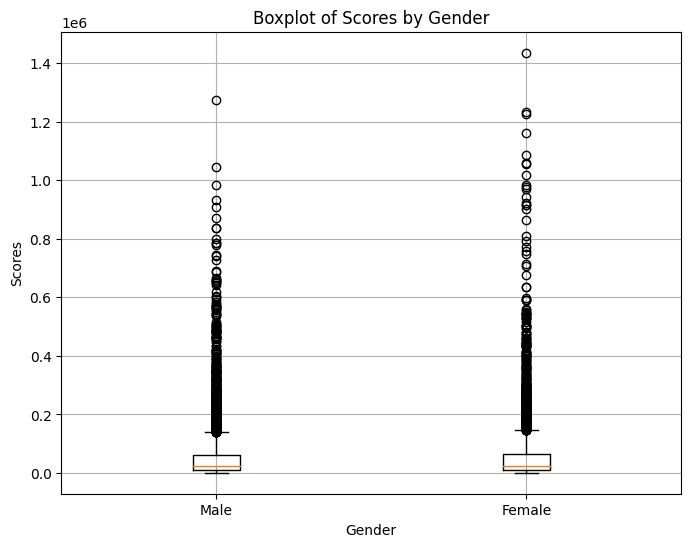

F_onewayResult(statistic=2.044168187956769, pvalue=0.15282479681427144)

In [42]:
# ANOVA procedure
import matplotlib.pyplot as plt

SUPPORT.head()

from scipy.stats import ttest_ind

male_scores = SUPPORT[SUPPORT['sex'] == 1]['charges']
female_scores = SUPPORT[SUPPORT['sex'] == 0]['charges']

plt.figure(figsize=(8, 6))
plt.boxplot([male_scores, female_scores], labels=['Male', 'Female'])
plt.title('Boxplot of Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Scores')
plt.grid(True)
plt.show()


from scipy.stats import f_oneway

#perform one-way ANOVA
f_oneway(male_scores, female_scores)

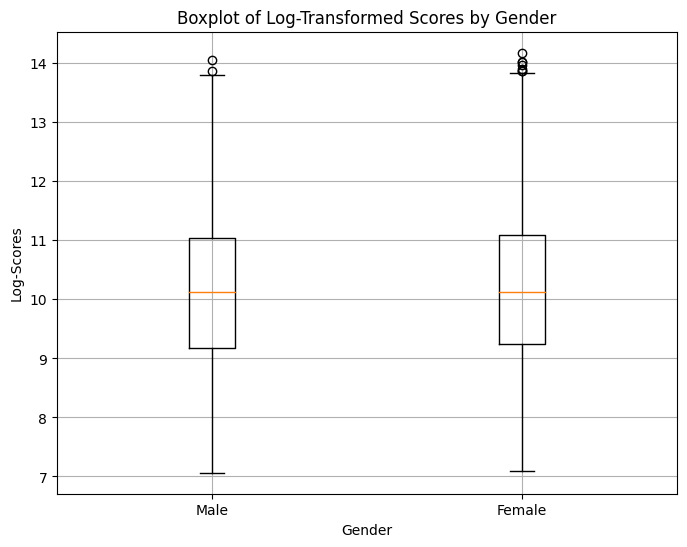

F_onewayResult(statistic=2.5191173823123405, pvalue=0.112508253339146)

In [43]:
import numpy as np

# Take the natural logarithm of the charges data
log_male_scores = np.log(male_scores)
log_female_scores = np.log(female_scores)

# Plot the boxplot of log-transformed scores
plt.figure(figsize=(8, 6))
plt.boxplot([log_male_scores, log_female_scores], labels=['Male', 'Female'])
plt.title('Boxplot of Log-Transformed Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Log-Scores')
plt.grid(True)
plt.show()

# Perform one-way ANOVA on the log-transformed data
f_oneway(log_male_scores, log_female_scores)


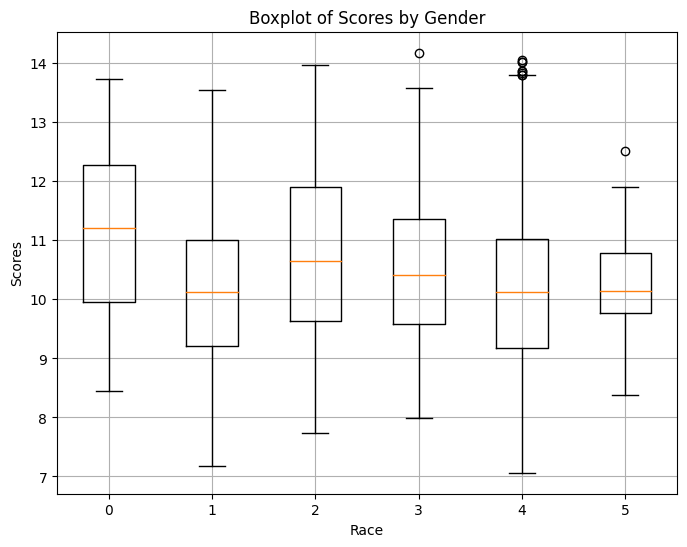

F_onewayResult(statistic=24.503667663881895, pvalue=1.355746479339789e-24)

In [44]:
# ANOVA procedure
import matplotlib.pyplot as plt

SUPPORT.head()

from scipy.stats import ttest_ind

score_0 = np.log(SUPPORT[SUPPORT['race'] == 0]['charges'])
score_1 = np.log(SUPPORT[SUPPORT['race'] == 1]['charges'])
score_2 = np.log(SUPPORT[SUPPORT['race'] == 2]['charges'])
score_3 = np.log(SUPPORT[SUPPORT['race'] == 3]['charges'])
score_4 = np.log(SUPPORT[SUPPORT['race'] == 4]['charges'])
score_5 = np.log(SUPPORT[SUPPORT['race'] == 5]['charges'])

plt.figure(figsize=(8, 6))
plt.boxplot([score_0, score_1,score_2,score_3,score_4,score_5], labels=['0','1','2','3','4','5'])
plt.title('Boxplot of Scores by Gender')
plt.xlabel('Race')
plt.ylabel('Scores')
plt.grid(True)
plt.show()


from scipy.stats import f_oneway

#perform one-way ANOVA
f_oneway(score_0, score_1,score_2,score_3,score_4,score_5)

In [45]:
from scipy.stats import tukey_hsd
tukey = tukey_hsd(score_0, score_1,score_2,score_3,score_4,score_5)
print(tukey)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      1.018     0.000     0.605     1.431
 (0 - 2)      0.416     0.094    -0.037     0.869
 (0 - 3)      0.651     0.005     0.127     1.176
 (0 - 4)      1.017     0.000     0.613     1.421
 (0 - 5)      0.899     0.002     0.217     1.581
 (1 - 0)     -1.018     0.000    -1.431    -0.605
 (1 - 2)     -0.602     0.000    -0.833    -0.372
 (1 - 3)     -0.367     0.034    -0.718    -0.016
 (1 - 4)     -0.001     1.000    -0.105     0.104
 (1 - 5)     -0.119     0.991    -0.679     0.440
 (2 - 0)     -0.416     0.094    -0.869     0.037
 (2 - 1)      0.602     0.000     0.372     0.833
 (2 - 3)      0.235     0.539    -0.162     0.633
 (2 - 4)      0.601     0.000     0.388     0.815
 (2 - 5)      0.483     0.180    -0.107     1.073
 (3 - 0)     -0.651     0.005    -1.176    -0.127
 (3 - 1)      0.367     0.034     0.016     0.718
 (3 - 2)     -0.235     0.539   

In [46]:
y1 = SUPPORT['hospdead']
X1 = SUPPORT.drop('hospdead', axis = 1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.2, random_state = 42)

In [76]:
logit_model = sm.Logit(y_train1, sm.add_constant(X_train1)).fit()
logit_model.summary()

         Current function value: 0.151131
         Iterations: 35


C:\Users\koush\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               hospdead   No. Observations:                 7284
Model:                          Logit   Df Residuals:                     7239
Method:                           MLE   Df Model:                           44
Date:                Fri, 17 May 2024   Pseudo R-squ.:                  0.7358
Time:                        06:23:12   Log-Likelihood:                -1100.8
converged:                      False   LL-Null:                       -4165.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3202     99.644     -0.094      0.925    -204.620     185.979
age            0.0016      0.005      0.311      0.756      -0.009       0.012
sex           -0.0912      0.113     -0.808      0.419      -0.312       0.130
dzgroup       -0.0170      0.032     -0.532      0.595      -0.079       0.046
dzclass        0.1725      0.075      2.314      0.021       0.026       0.319
num.co        -0.1074      0.049     -2.186      0.029      -0.204      -0.011
edu            0.0352      0.018      1.939      0.053      -0.000       0.071
income         0.0133      0.054      0.245      0.807      -0.093       0.120
scoma          0.0046      0.003      1.328      0.184      -0.002       0.011
charges     4.468e-07   8.26e-07      0.541      0.588   -1.17e-06    2.07e-06
totcst      4.159e-06   2.33e-06      1.782      0.075   -4.14e-07    8.73e-06
totmcst    -5.988e-06   2.08e-06     -2.873      0.004   -1.01e-05    -1.9e-06
avtisst        0.0884      0.006     14.298      0.000       0.076       0.101
race          -0.1130      0.050     -2.250      0.024      -0.211      -0.015
sps            0.0237      0.016      1.440      0.150      -0.009       0.056
aps            0.0198      0.005      4.026      0.000       0.010       0.030
surv2m        -1.1938      1.205     -0.991      0.322      -3.555       1.167
surv6m         1.3988      0.963      1.452      0.146      -0.489       3.287
hday           0.0013      0.007      0.203      0.839      -0.012       0.014
diabetes      -0.0289      0.157     -0.184      0.854      -0.337       0.279
dementia      -0.0470      0.278     -0.169      0.866      -0.592       0.498
ca            -0.0364      0.102     -0.356      0.721      -0.237       0.164
prg2m         -0.9287      0.450     -2.062      0.039      -1.811      -0.046
prg6m          0.9210      0.493      1.866      0.062      -0.046       1.888
dnr           -0.7990      0.063    -12.727      0.000      -0.922      -0.676
dnrday         0.0178      0.004      4.475      0.000       0.010       0.026
meanbp         0.0036      0.002      1.757      0.079      -0.000       0.008
wblc          -0.0035      0.006     -0.596      0.551      -0.015       0.008
hrt            0.0002      0.002      0.111      0.912      -0.004       0.004
resp          -0.0071      0.006     -1.227      0.220      -0.018       0.004
temp          -0.0014      0.046     -0.030      0.976      -0.091       0.088
pafi           0.0003      0.001      0.583      0.560      -0.001       0.001
alb           -0.0518      0.097     -0.536      0.592      -0.241       0.138
bili           0.0131      0.013      1.034      0.301      -0.012       0.038
crea           0.0184      0.043      0.432      0.666      -0.065       0.102
sod            0.0007      0.009      0.080      0.936      -0.017       0.019
ph            -1.0586      0.786     -1.346      0.178      -2.600       0.483
glucose    -7.808e-05      0.001     -0.082      0.935      -0.002       0.002
bu

In [77]:
coefficients = logit_model.params
variable_names = coefficients.index

equation = "P(Y=1) = "
for i, (variable, coefficient) in enumerate(zip(variable_names, coefficients)):
    if variable == "const":
        continue
    if i == 0:
        equation += f"{coefficient:.4f} * {variable}"
    else:
        equation += f" + {coefficient:.4f} * {variable}"

print("Logistic Regression Equation:")
print(equation)


Logistic Regression Equation:
P(Y=1) =  + 0.0016 * age + -0.0912 * sex + -0.0170 * dzgroup + 0.1725 * dzclass + -0.1074 * num.co + 0.0352 * edu + 0.0133 * income + 0.0046 * scoma + 0.0000 * charges + 0.0000 * totcst + -0.0000 * totmcst + 0.0884 * avtisst + -0.1130 * race + 0.0237 * sps + 0.0198 * aps + -1.1938 * surv2m + 1.3988 * surv6m + 0.0013 * hday + -0.0289 * diabetes + -0.0470 * dementia + -0.0364 * ca + -0.9287 * prg2m + 0.9210 * prg6m + -0.7990 * dnr + 0.0178 * dnrday + 0.0036 * meanbp + -0.0035 * wblc + 0.0002 * hrt + -0.0071 * resp + -0.0014 * temp + 0.0003 * pafi + -0.0518 * alb + 0.0131 * bili + 0.0184 * crea + 0.0007 * sod + -1.0586 * ph + -0.0001 * glucose + -0.0014 * bun + -0.0000 * urine + -0.0963 * adlp + -0.1554 * adls + 0.1694 * adlsc + 14.7326 * death + -1.2396 * sfdm2


In [81]:
import numpy as np

# Get the coefficients and standard errors from the logistic regression model
coefficients = logit_model.params
standard_errors = logit_model.bse

# Extract the continuous predictors
continuous_predictors = ['totcst', 'hday', 'dnrday', 'avtisst', 'bili', 'bun', 'edu', 'alb', 'dnr', 'urine', 'age', 'dzgroup', 'surv6m', 'sps', 'crea', 'aps', 'wblc', 'race', 'prg2m', 'sfdm2', 'meanbp', 'diabetes', 'num.co', 'dzclass', 'temp', 'totmcst', 'ph', 'glucose', 'surv2m', 'scoma', 'adls', 'adlsc', 'sex', 'income']  # Add the names of your continuous predictors here

# Calculate the odds ratio and its 95% confidence interval for each continuous predictor
odds_ratios = {}
for predictor in continuous_predictors:
    coefficient = coefficients[predictor]
    standard_error = standard_errors[predictor]
    
    # Calculate the odds ratio
    odds_ratio = np.exp(coefficient)
    
    # Calculate the 95% confidence interval for the odds ratio
    ci_lower = np.exp(coefficient - 1.96 * standard_error)
    ci_upper = np.exp(coefficient + 1.96 * standard_error)
    
    odds_ratios[predictor] = (odds_ratio, ci_lower, ci_upper)

# Print the odds ratios and their 95% confidence intervals
print("Odds Ratios for Predictors:")
for predictor, (odds_ratio, ci_lower, ci_upper) in odds_ratios.items():
    print(f"{predictor}: Odds Ratio = {odds_ratio:.4f}, 95% CI = [{ci_lower:.4f}, {ci_upper:.4f}]")


Odds Ratios for Predictors:
totcst: Odds Ratio = 1.0000, 95% CI = [1.0000, 1.0000]
hday: Odds Ratio = 1.0013, 95% CI = [0.9886, 1.0143]
dnrday: Odds Ratio = 1.0179, 95% CI = [1.0100, 1.0259]
avtisst: Odds Ratio = 1.0925, 95% CI = [1.0793, 1.1058]
bili: Odds Ratio = 1.0132, 95% CI = [0.9884, 1.0386]
bun: Odds Ratio = 0.9986, 95% CI = [0.9920, 1.0053]
edu: Odds Ratio = 1.0358, 95% CI = [0.9996, 1.0733]
alb: Odds Ratio = 0.9495, 95% CI = [0.7856, 1.1475]
dnr: Odds Ratio = 0.4498, 95% CI = [0.3977, 0.5087]
urine: Odds Ratio = 1.0000, 95% CI = [0.9998, 1.0001]
age: Odds Ratio = 1.0017, 95% CI = [0.9913, 1.0121]
dzgroup: Odds Ratio = 0.9832, 95% CI = [0.9237, 1.0466]
surv6m: Odds Ratio = 4.0503, 95% CI = [0.6130, 26.7593]
sps: Odds Ratio = 1.0240, 95% CI = [0.9915, 1.0575]
crea: Odds Ratio = 1.0186, 95% CI = [0.9368, 1.1076]
aps: Odds Ratio = 1.0200, 95% CI = [1.0102, 1.0300]
wblc: Odds Ratio = 0.9965, 95% CI = [0.9851, 1.0080]
race: Odds Ratio = 0.8931, 95% CI = [0.8094, 0.9855]
prg2m: Odds

In [48]:
#b
from math import exp
coefs = logit_model.params

y_pred1 = logit_model.predict(sm.add_constant(X_test1))
y_pred1.head()

8629    8.903734e-03
1068    3.841254e-10
6548    7.927871e-02
5458    2.075805e-01
5317    1.492140e-10
dtype: float64

In [49]:
y_pred_thresholded = []
for y in y_pred1:
    if y > 0.5:
        y_pred_thresholded.append(1)
    else:
        y_pred_thresholded.append(0)
y_test1.head()

8629    0
1068    0
6548    0
5458    0
5317    0
Name: hospdead, dtype: int64

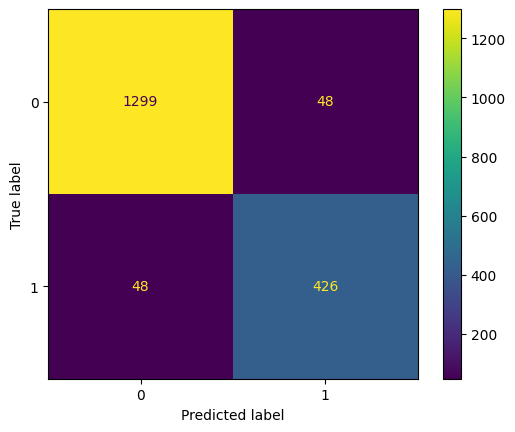

missclassification rate = 0.05271828665568369
classfication accuracy = 0.9472817133443163


In [50]:
# c)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test1, y_pred_thresholded)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1]) 
cm_display.plot()
plt.show()
# c)
misclassification_rate = (confusion_matrix[0, 1] + confusion_matrix[1, 0]) / len(y_test1)
print(f"missclassification rate = {misclassification_rate}")
print(f"classfication accuracy = {1-misclassification_rate}")

C:\Users\koush\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


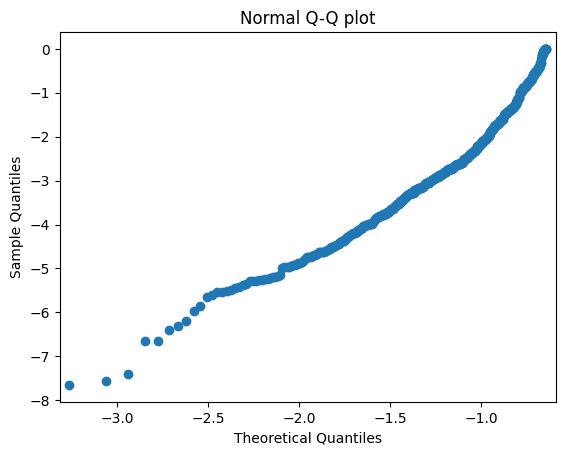

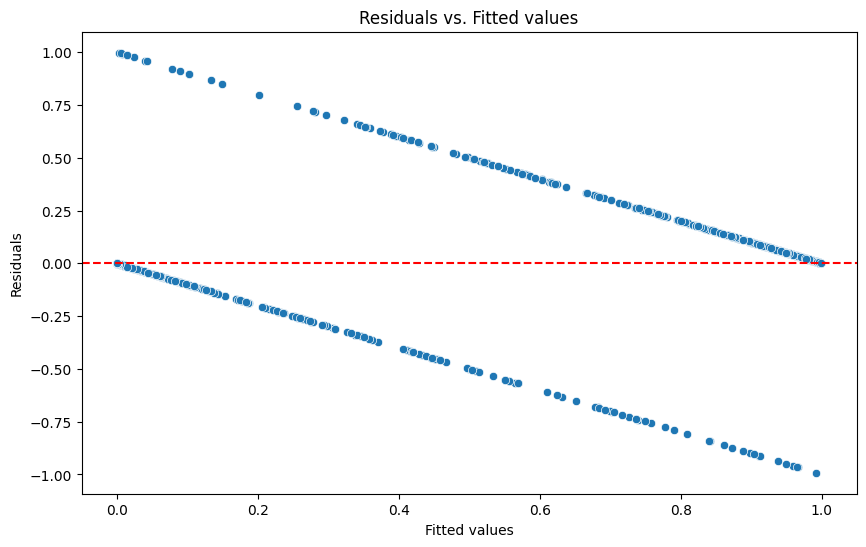

IndexError: index 4 is out of bounds for axis 0 with size 4

In [86]:
residuals1 = y_test1 - y_pred1
# Normal Q-Q plot
sm.qqplot(np.log(residuals1), line='s') # need to update
plt.title('Normal Q-Q plot') # need to update
plt.show()
# Residuals vs. Fitted values plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred1, y=(residuals1))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted values")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
# Manually calculate residuals


# # Loop through each predictor for individual residual plots
# for predictor in X_test1.columns:
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=X_test1[predictor], y=residuals1)
#     plt.xlabel(predictor)
#     plt.ylabel("Residuals")
#     plt.title(f"Residuals vs. {predictor}")
#     plt.axhline(y=0, color='r', linestyle='--')
#     plt.show()
    
#     fig, axs = plt.subplots(4, 4, figsize=(12, 12))  # 4x4 matrix of subplots

# Loop through each predictor for individual residual plots
for i, predictor in enumerate(X_test1.columns):
    row = i // 4  # Determine the row index
    col = i % 4   # Determine the column index
    
    axs[row, col].scatter(X_test1[predictor], residuals1)
    axs[row, col].set_xlabel(predictor)
    axs[row, col].set_ylabel("Residuals")
    axs[row, col].set_title(f"Residuals vs. {predictor}")
    axs[row, col].axhline(y=0, color='r', linestyle='--')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

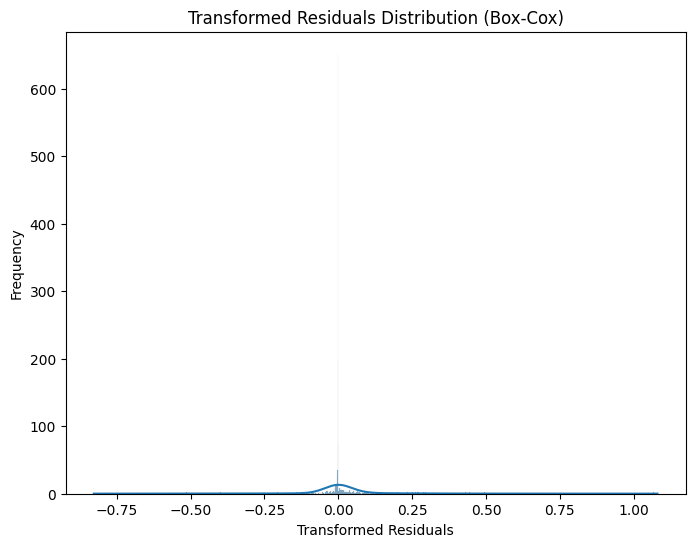

In [84]:
from scipy.stats import boxcox

# Perform Box-Cox transformation on residuals
transformed_residuals, _ = boxcox(residuals1 + 1)  # Adding 1 to avoid non-positive values

# Plot the transformed residuals
plt.figure(figsize=(8, 6))
sns.histplot(transformed_residuals, kde=True)
plt.title("Transformed Residuals Distribution (Box-Cox)")
plt.xlabel("Transformed Residuals")
plt.ylabel("Frequency")
plt.show()


In [52]:
type(X_train.values)

numpy.ndarray

In [53]:
anova_result = stats.f_oneway(X_train['dzclass'], X_train['dzgroup'])
t_stat, p_val = stats.ttest_ind(X_train['dzclass'], X_train['dzgroup'])

confidence_interval = stats.norm.interval(0.95, loc=np.mean(X_train), scale=np.std(X_train))

In [54]:
anova_result

F_onewayResult(statistic=2094.131781422799, pvalue=0.0)

In [55]:
import scipy.stats as stats

sample_mean = np.mean(SUPPORT['sex'])
sample_std = np.std(SUPPORT['sex'], ddof=1)  # Use ddof=1 for sample standard deviation

# Define confidence level and degrees of freedom
confidence_level = 0.95
df = len(SUPPORT['sex']) - 1  # Degrees of freedom for a t-distribution

# Calculate critical value (two-tailed)
critical_value = stats.t.ppf((1 + confidence_level) / 2, df)

# Calculate margin of error
margin_of_error = critical_value * (sample_std / np.sqrt(len(SUPPORT['sex'])))

# Compute confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Sample Mean:", sample_mean)
print("Margin of Error:", margin_of_error)
print("Confidence Interval:", confidence_interval)


Sample Mean: 0.5628775398132894
Margin of Error: 0.01019056421139275
Confidence Interval: (0.5526869756018966, 0.5730681040246821)


In [56]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('charges ~ C(dzclass) + C(sex) + C(dzclass):C(sex)', data=SUPPORT).fit()

# Perform two-way ANOVA
result = sm.stats.anova_lm(model, type=2)

# Print the result
print(result)


                       df        sum_sq       mean_sq           F  \
C(dzclass)            3.0  1.203796e+13  4.012654e+12  443.646463   
C(sex)                1.0  8.870696e+06  8.870696e+06    0.000981   
C(dzclass):C(sex)     3.0  3.126389e+09  1.042130e+09    0.115220   
Residual           9097.0  8.227973e+13  9.044711e+09         NaN   

                          PR(>F)  
C(dzclass)         5.096828e-269  
C(sex)              9.750173e-01  
C(dzclass):C(sex)   9.512219e-01  
Residual                     NaN  


In [69]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('charges ~ C(sex) + C(ca) + C(sex):C(ca)', data=SUPPORT).fit()

# Perform two-way ANOVA
result = sm.stats.anova_lm(model, type=2)

# Print the result
print(result)


                  df        sum_sq       mean_sq           F        PR(>F)
C(sex)           1.0  2.117592e+10  2.117592e+10    2.111004  1.462778e-01
C(ca)            2.0  2.998131e+12  1.499066e+12  149.440227  1.386995e-64
C(sex):C(ca)     2.0  2.758396e+10  1.379198e+10    1.374908  2.529155e-01
Residual      9099.0  9.127394e+13  1.003121e+10         NaN           NaN


In [60]:
df_cat = SUPPORT[categorical]
df_num = SUPPORT.drop(columns=categorical)

for group in df_num.columns:
    for value in df_cat.columns:
        mc = MultiComparison(SUPPORT[value], SUPPORT[group])
        # Perform the Tukey's HSD test for multiple comparisons
        result = mc.tukeyhsd()
        # Print the results
        print(result)
        # Optionally, you can visualize the results using a plot
        result.plot_simultaneous()

KeyboardInterrupt: 